### Linear Regression with one variable x and two parameters θ

It is a supervised machine learning algorithm that best fits the data which has the target variable(dependent variable) as a linear combination of the input features(independent variables).

In [1]:
# used for manipulating directory paths
import os
# Scientific and vector computation for python
import numpy as np
# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

In [5]:
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

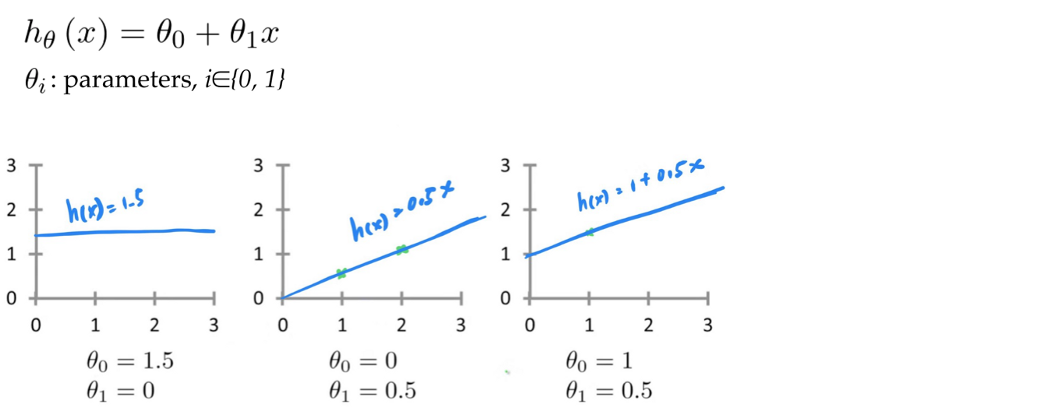

When new data appears (blue point), we can predict its label (black mark) by its feature(green mark).

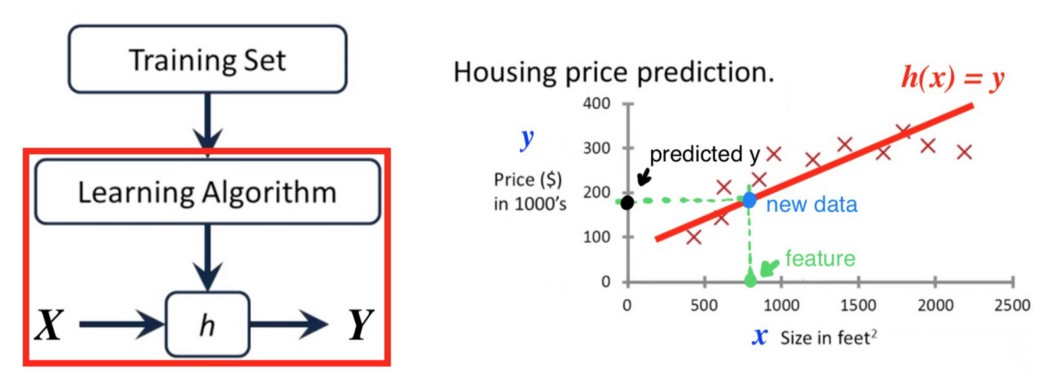

the bias term we include in our equations is meant to represent the tendency of the data to have a distribution centered about a given value that is offset from an origin

In [8]:
len(y)

97

Text(0.5, 0, 'Population of City in 10,000s')

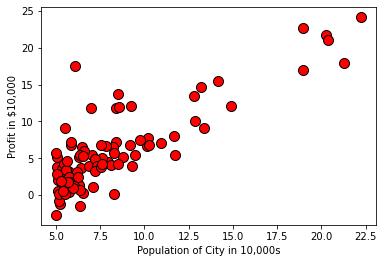

In [7]:
pyplot.plot(X, y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### Cost Function
***
    The accuracy of Hypothesis Function can be measured by using Cost Function.
***
Here, we use **Square Error Function**, one of the Cost Function, to measure the accuracy of Hypothesis Function.

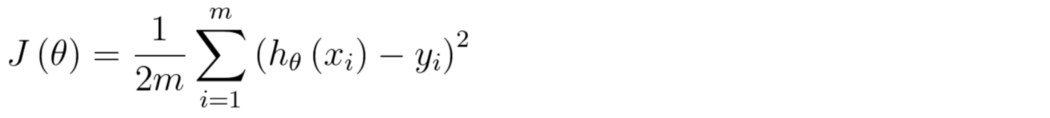

    J(θ): cost function
    θ: parameters of the hypothesis function h(x)
    h(x): predicted label of data i
    y: actual label of data i
    m: amount of data
    
For example, suppose there is a Linear Regression with one variable and two parameters θ, the square error function will be as below

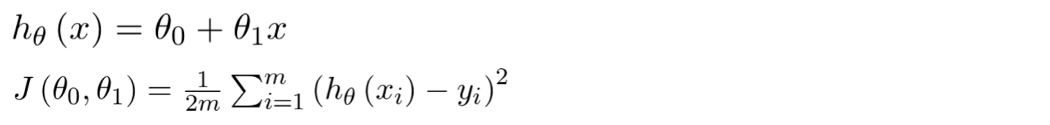

In the following figures, we can see what does Hypothesis Function and Cost Function look like.

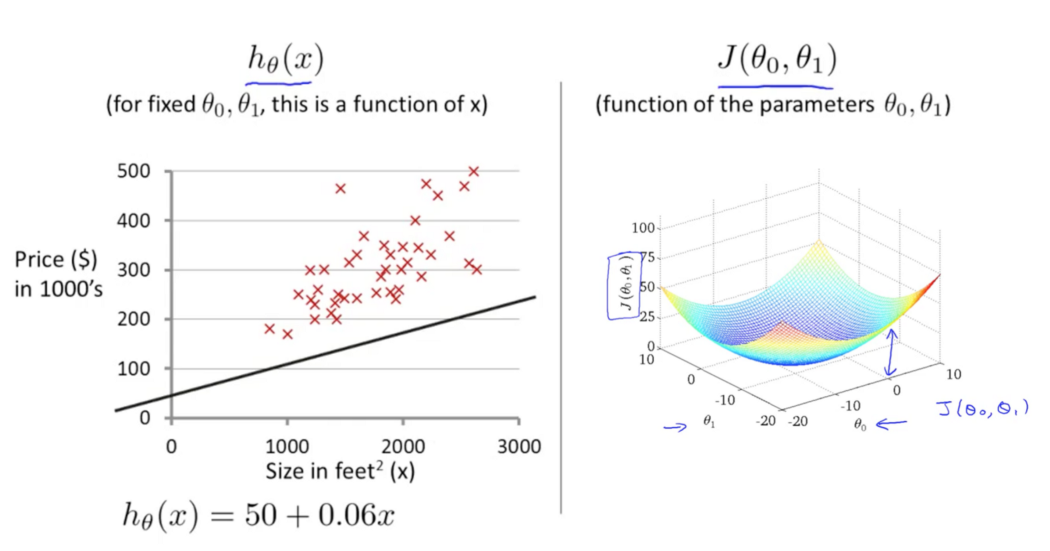

**Our goal is to minimize the cost function!!**

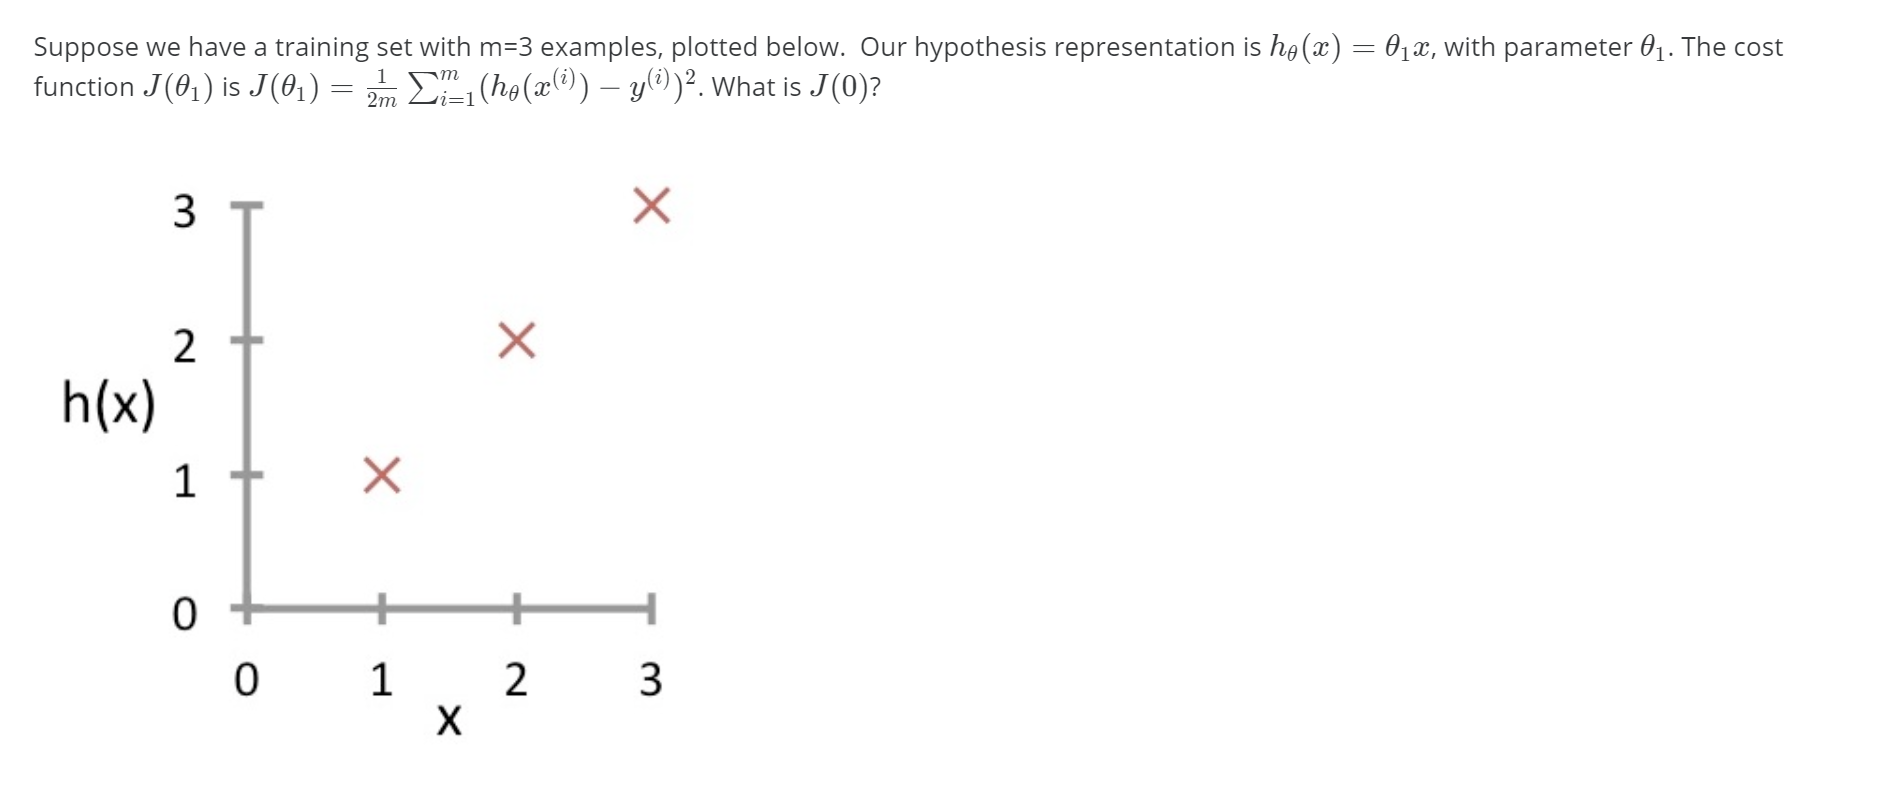

ans = 14/6

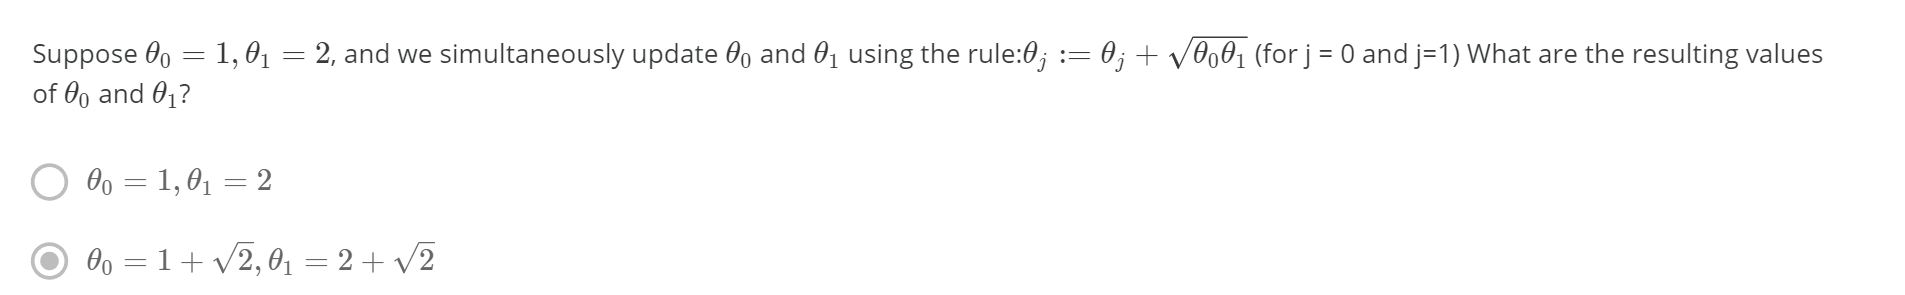

In [9]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

In [10]:
def computeCost(X, y, theta):
    
    m = y.size  # number of training examples
    J = 0
    J = 1/(2*m) * np.sum((np.dot(X,theta)-y)**2)
    
    return J     

In [11]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


### Gradient Descent Algorithm

**Using Gradient Descent Algorithm to minimize the cost function.**

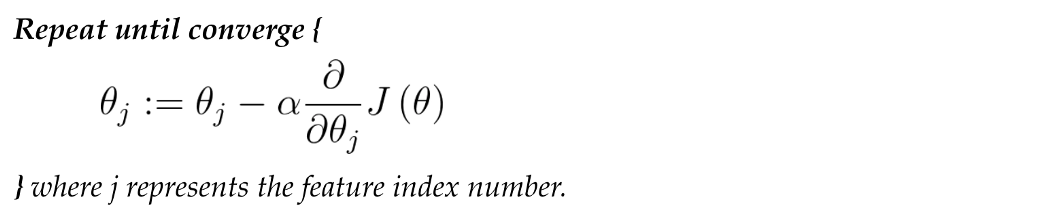

***
Note:
Parameters θ should be simultaneously update at each iteration.
***

This function is otherwise called the "Squared error function", or "Mean squared error". The mean is halved as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the half term.

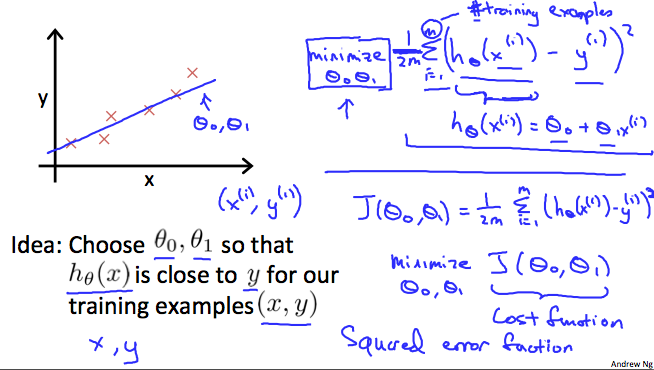

For example, applying Gradient Descent Algorithm to square error function,

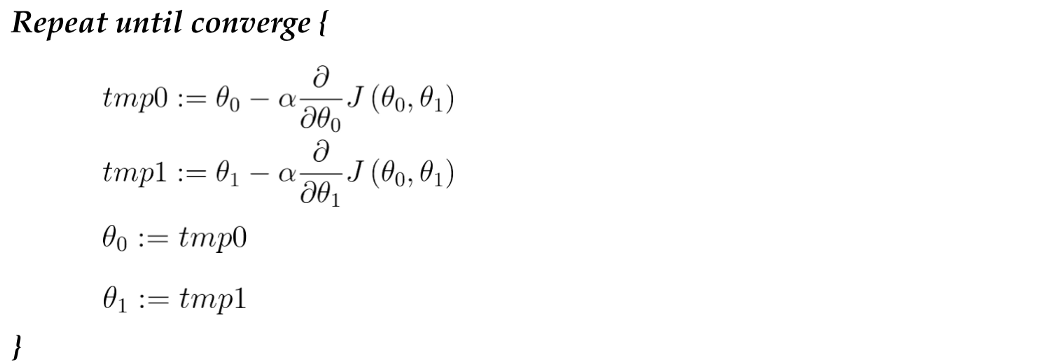

Gradient Descent is called ‘batch’ gradient descent if it needs to look at every example in the entire training set at each step.

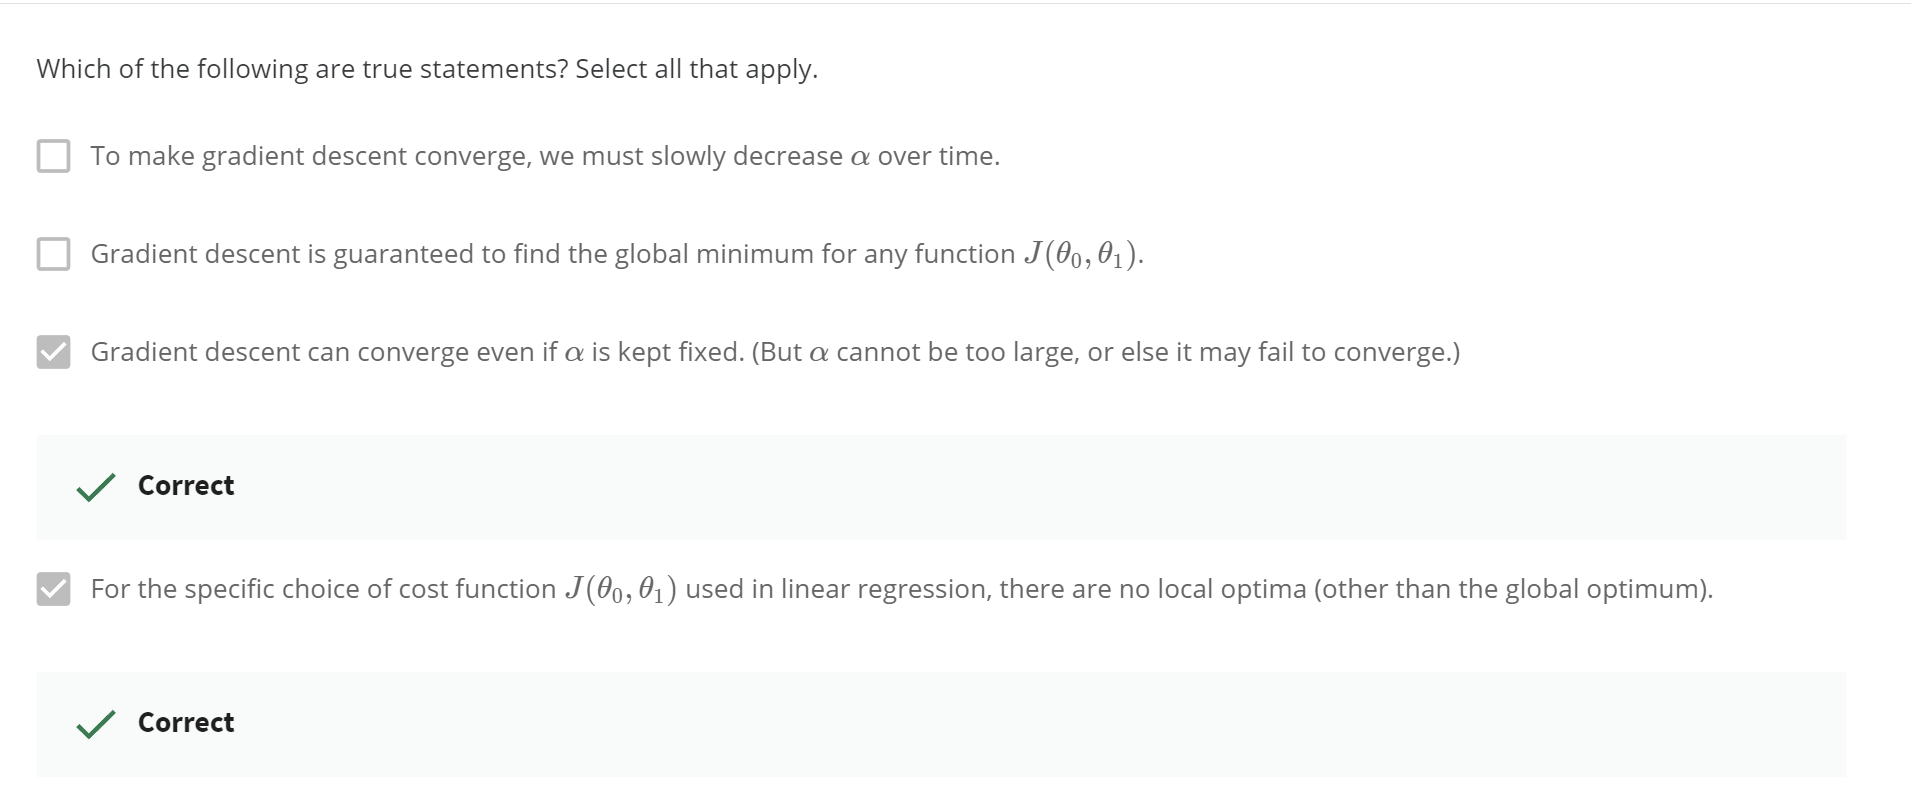

In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()  
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        
        theta = theta - (alpha/m)*((np.dot(X,theta)-y).dot(X))
        
        J_history.append(computeCost(X, y, theta))  
    
    return theta, J_history

In [13]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


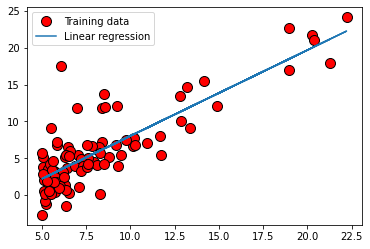

In [16]:
# plot the linear fit
pyplot.plot(X[:, 1], y, 'ro', ms=10, mec='k')
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

#### Learning Rate α

If α is too small, Gradient Descent is slow.
If α is too large, Gradient Descent may overshoot minimum and not converge.

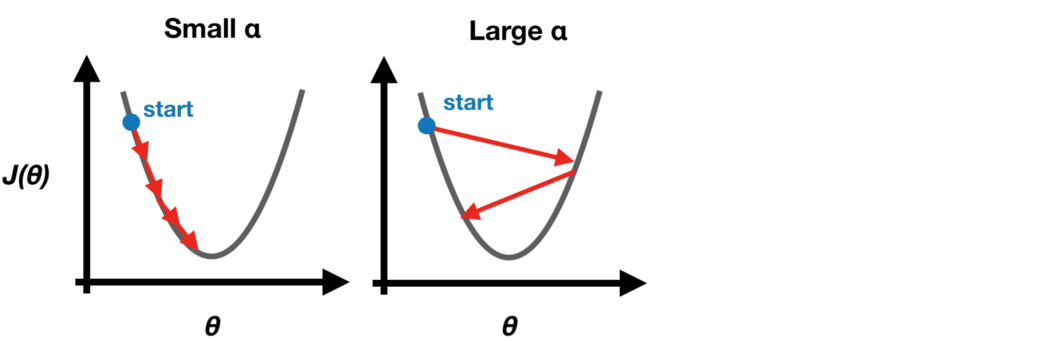

Choosing a proper learning rate α in the beginning and stick to it at each iteration since Gradient Descent will automatically take smaller steps when approaching local minimum.

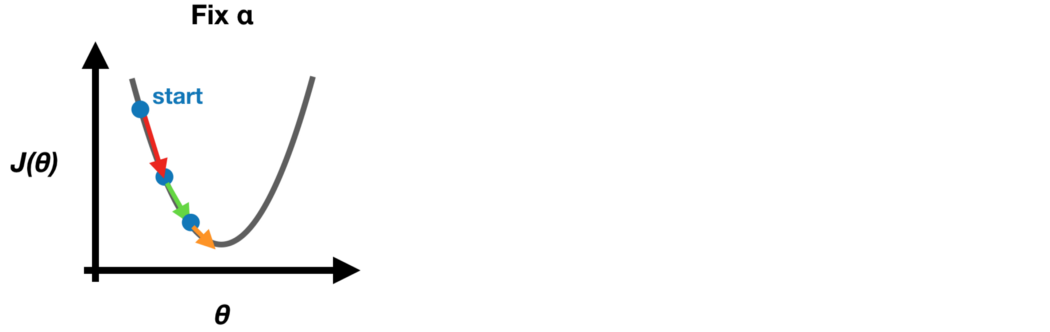


Applying Gradient Descent to minimize cost function and we can see what happens at each iteration, step1 to step 5.
Ultimately, we will get a good hypothesis function with parameters θ.

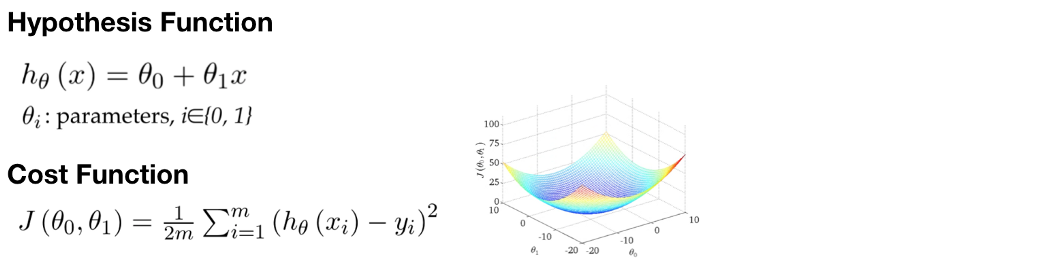

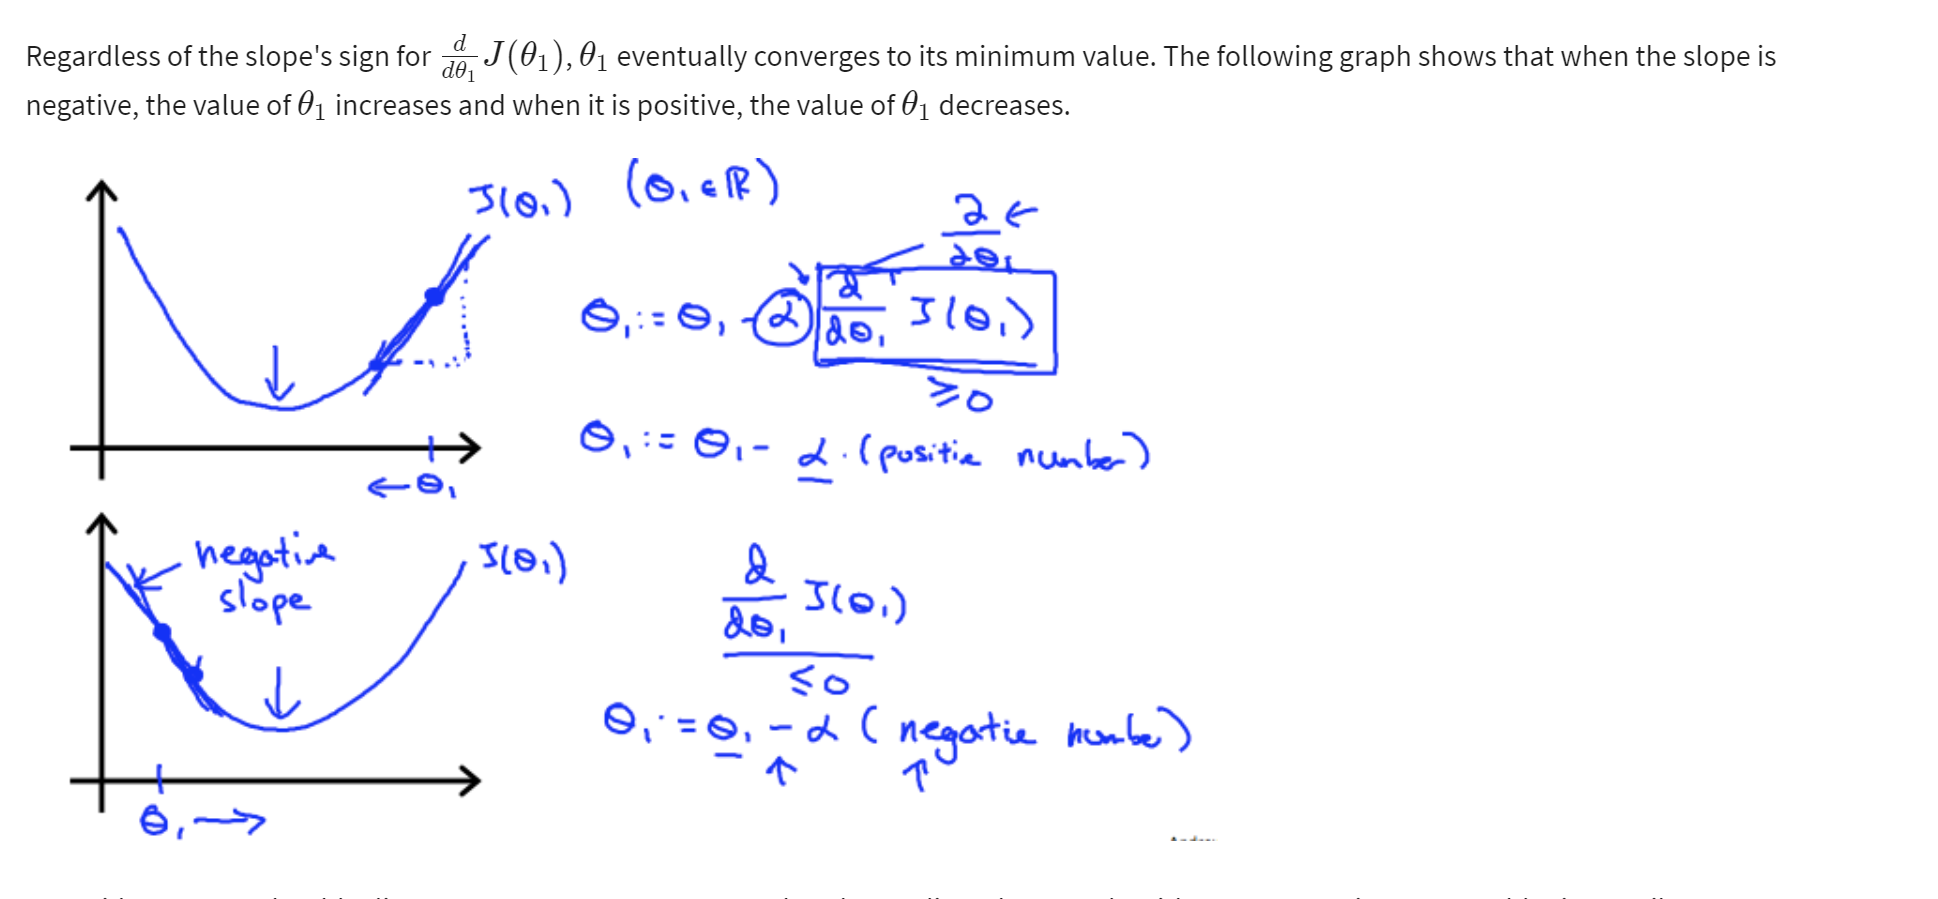

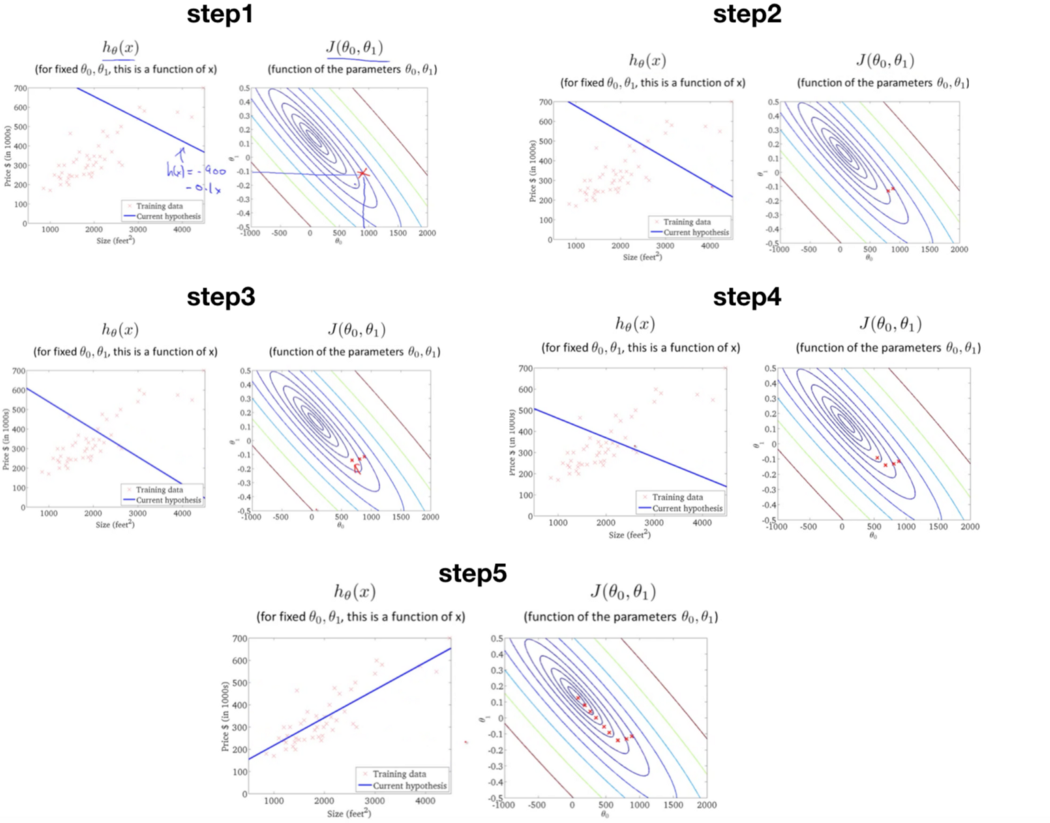

When specifically applied to the case of linear regression, a new form of the gradient descent equation can be derived. We can substitute our actual cost function and our actual hypothesis function and modify the equation to :

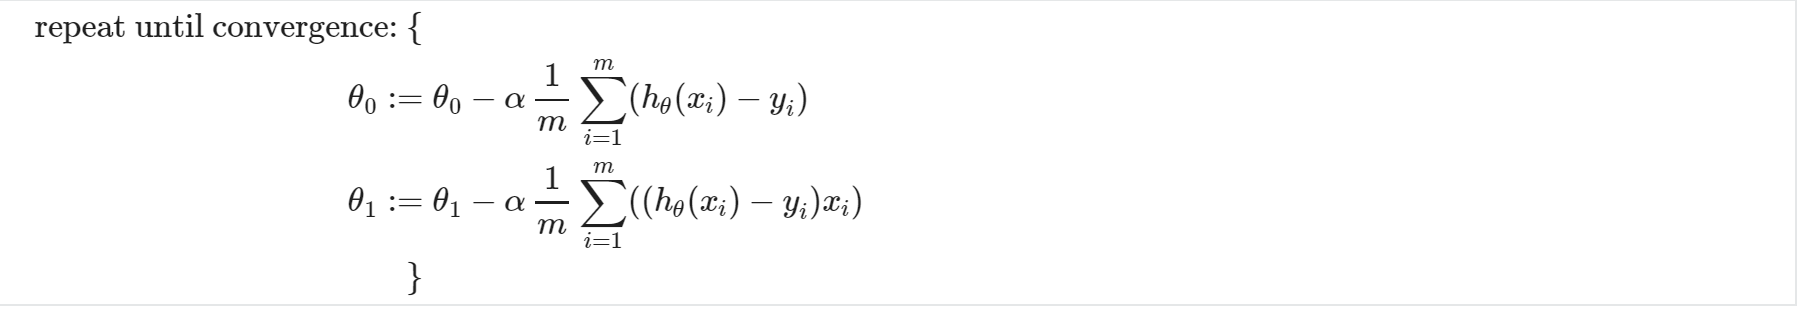

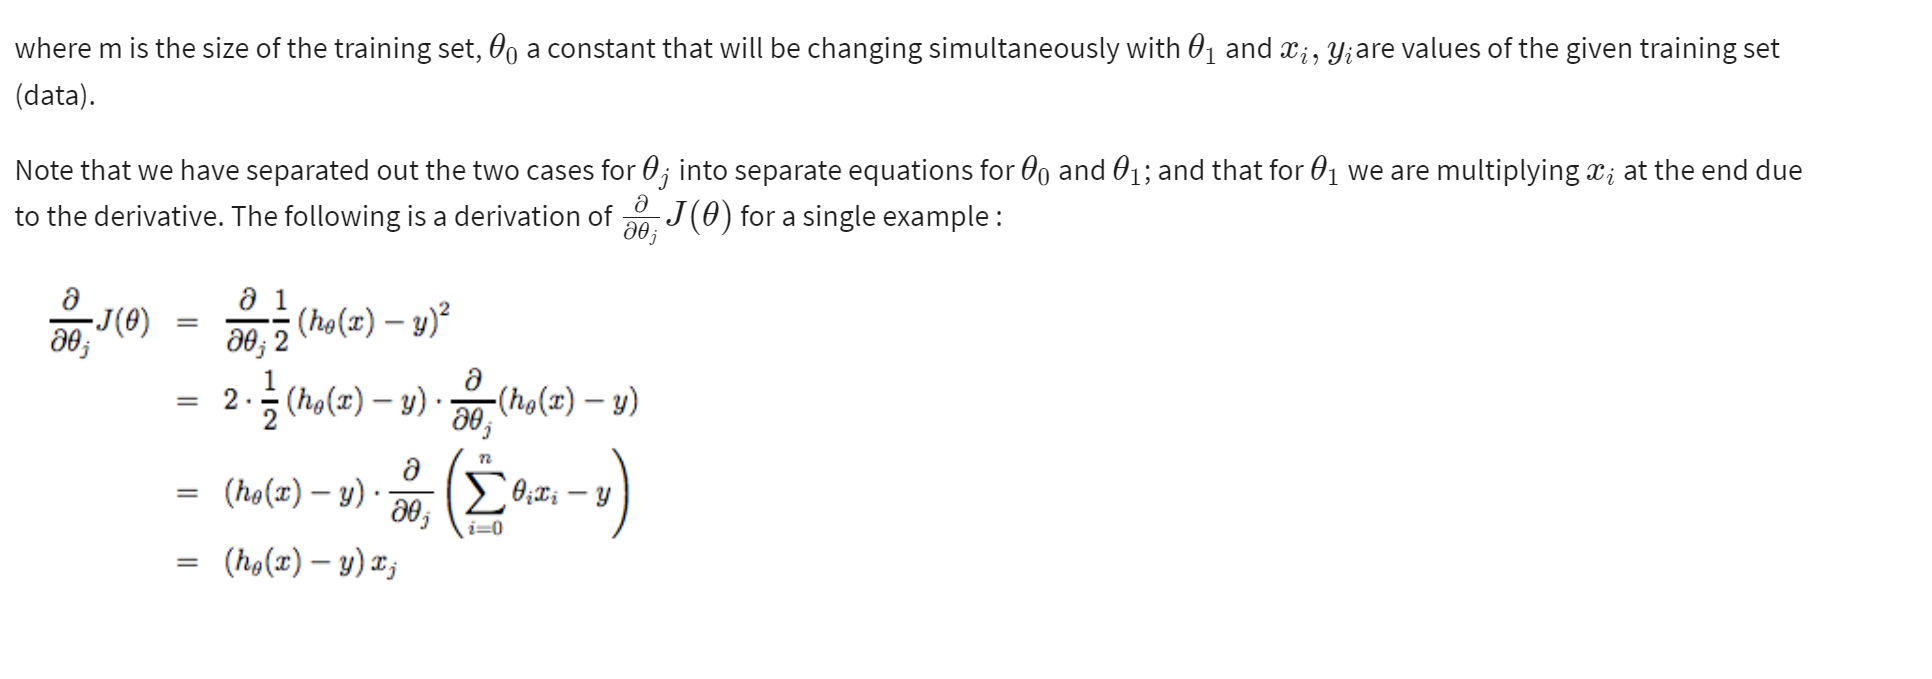

The point of all this is that if we start with a guess for our hypothesis and then repeatedly apply these gradient descent equations, our hypothesis will become more and more accurate.


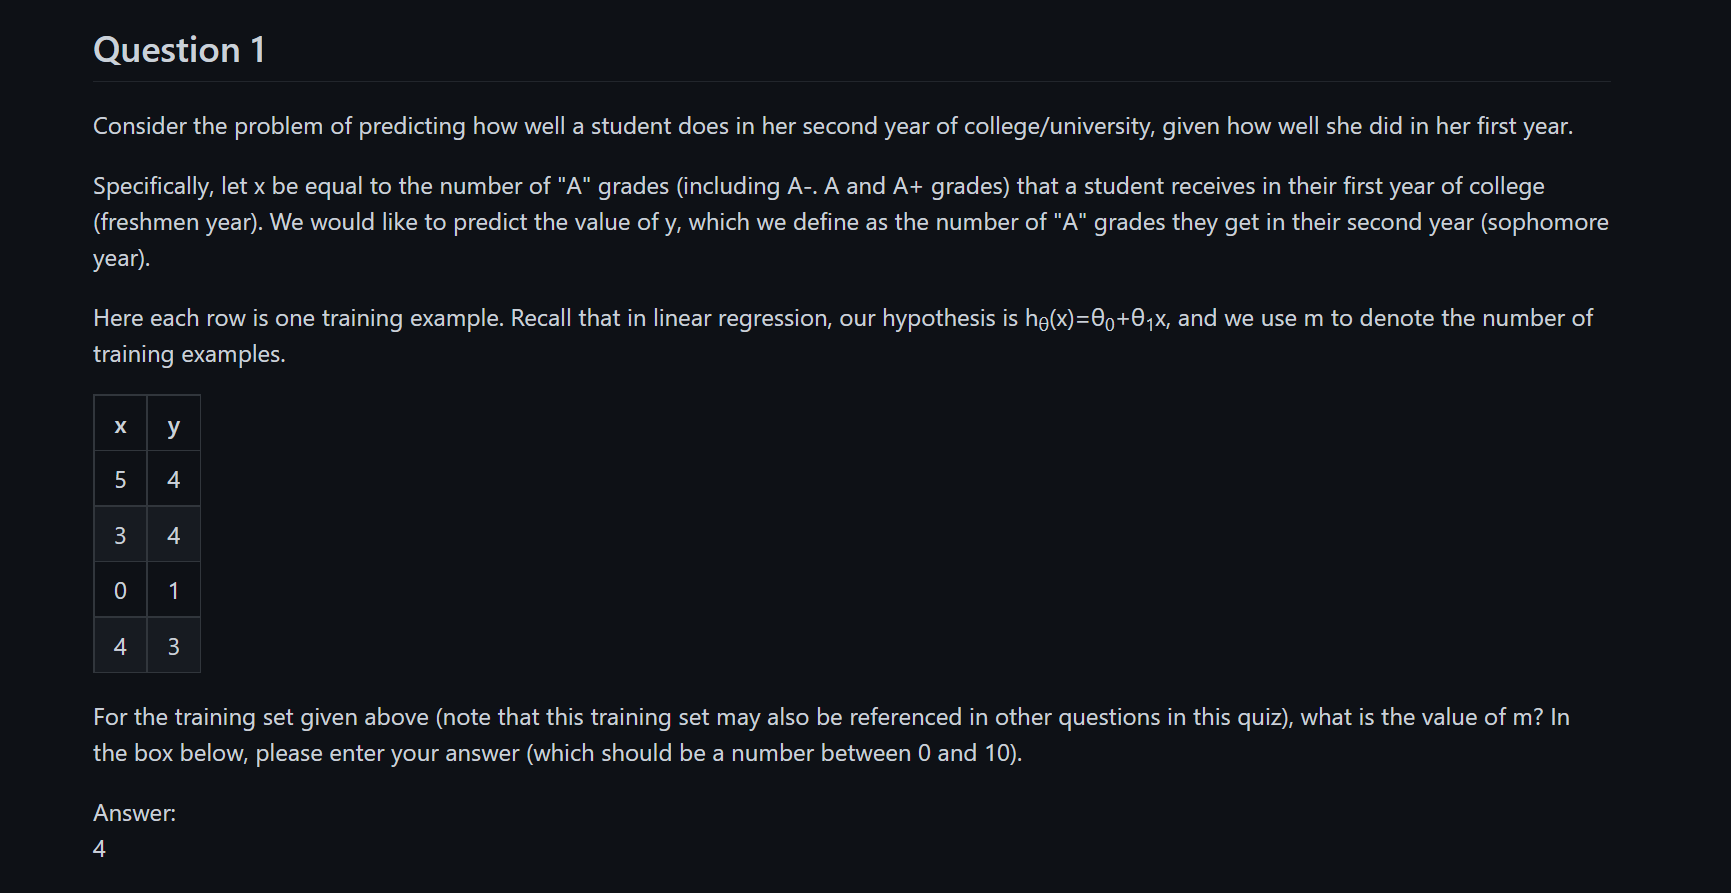

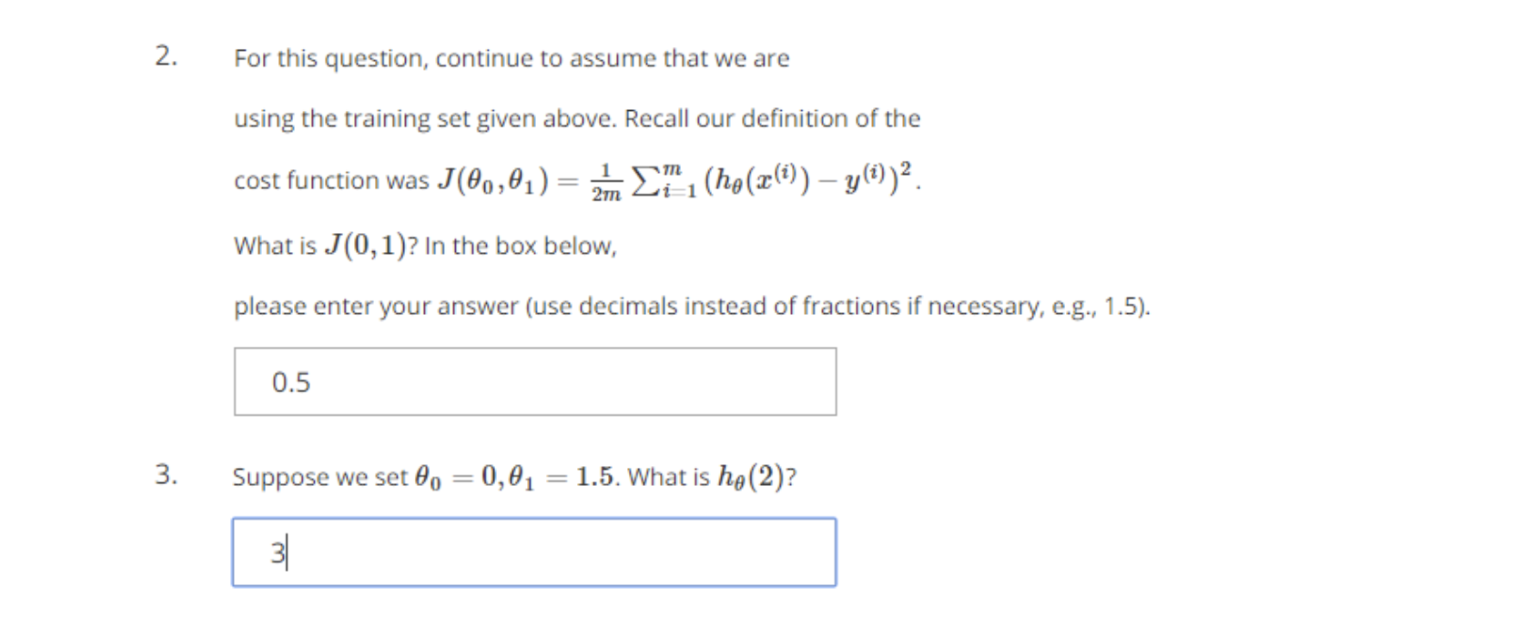

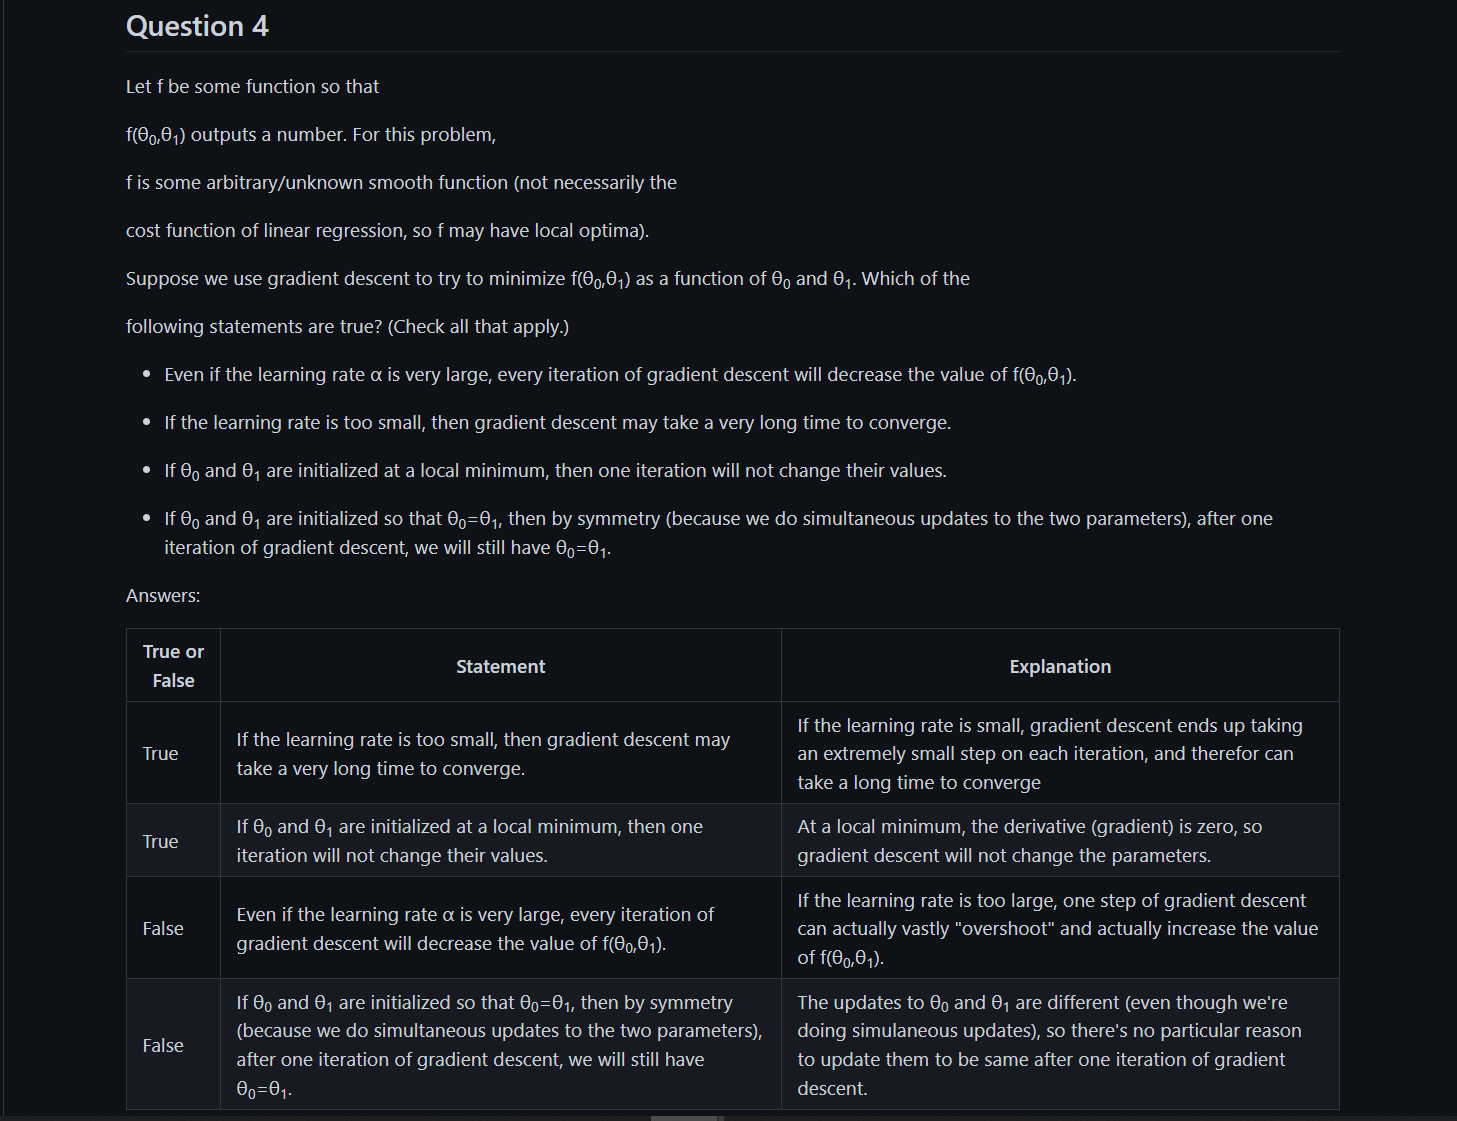

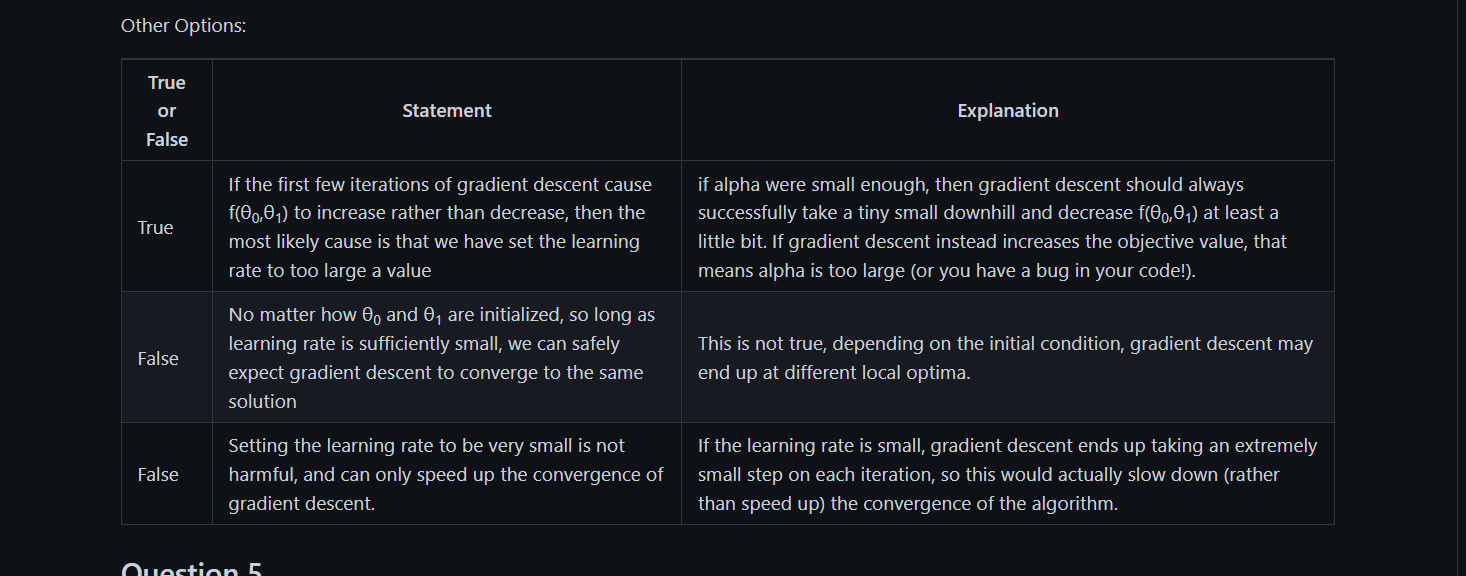

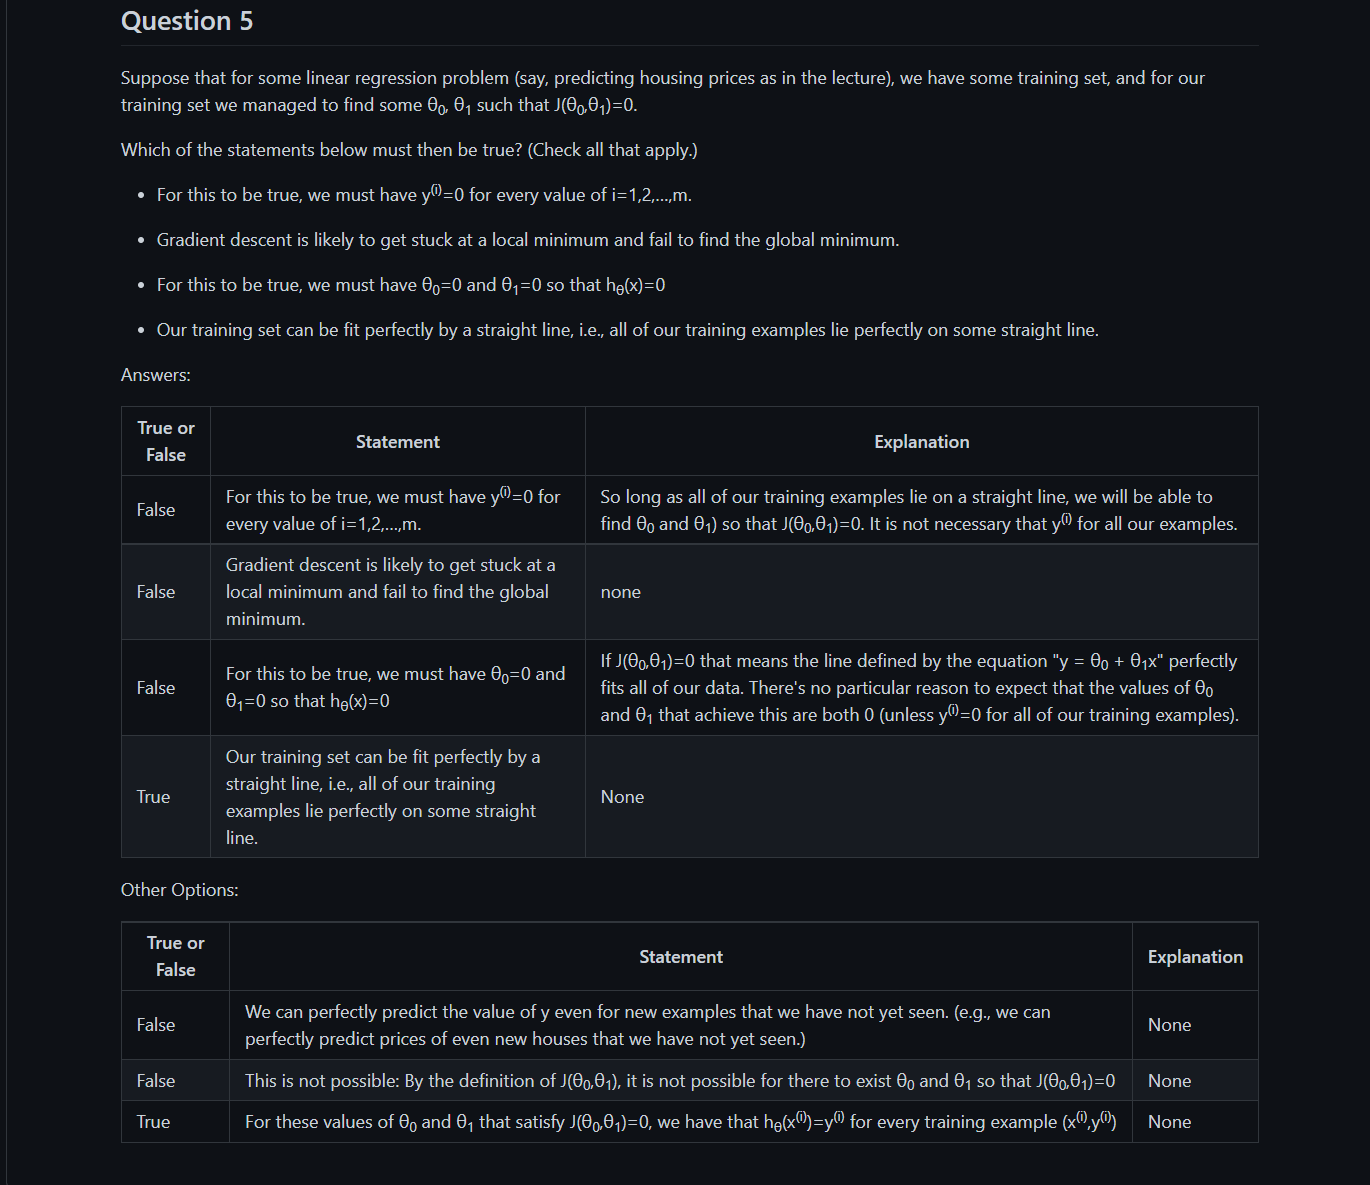

### Multivariate Linear Regression

If we have a continuous labeled data with more than one feature, we can use the multivariate linear regression to make a machine learning model.

Note that there is only one true model for the data. Unfortunately, we don’t know what the true model is. And in order to find the true one, we make a hypothesis, tuning it until we can check if it is close enough to the true model or it is a wrong one (according to the criterion such as accuracy, precision, F1 score etc.). If the hypothesis is wrong, then make another one and tune it.

When choosing a model, be utmost care about making the hypothesis.
Per above housing price example, suppose the true model for the data is linear, then we can try to use linear regression and its hypothesis function.

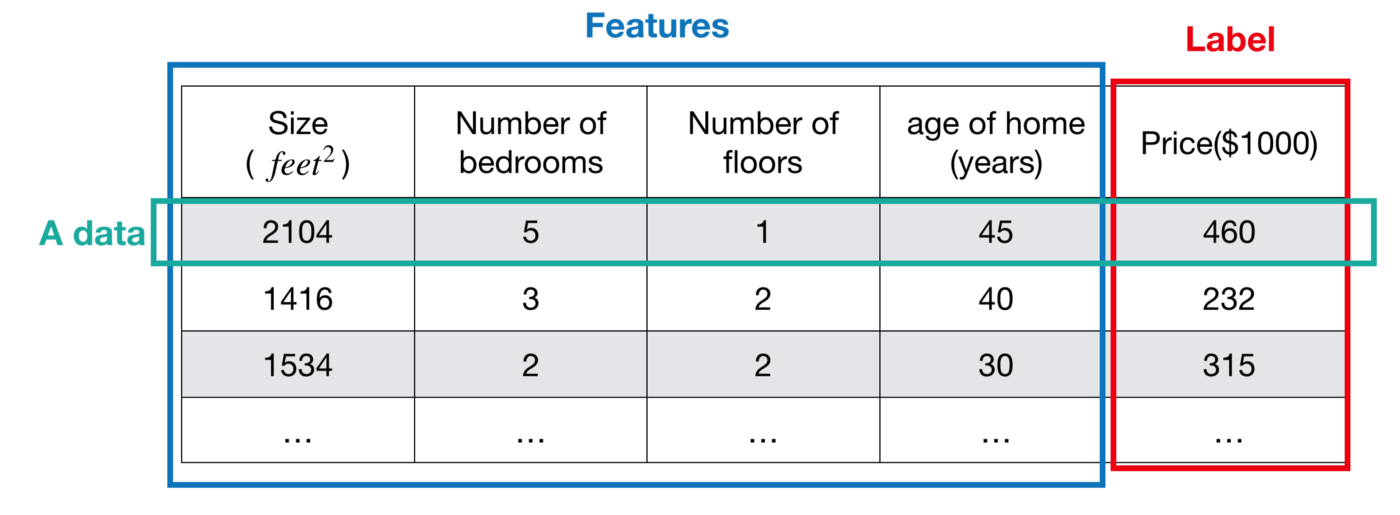

### Hypothesis function

In Multivariate Linear Regression, the hypothesis function with multiple variables x and parameters θ is denoted below.

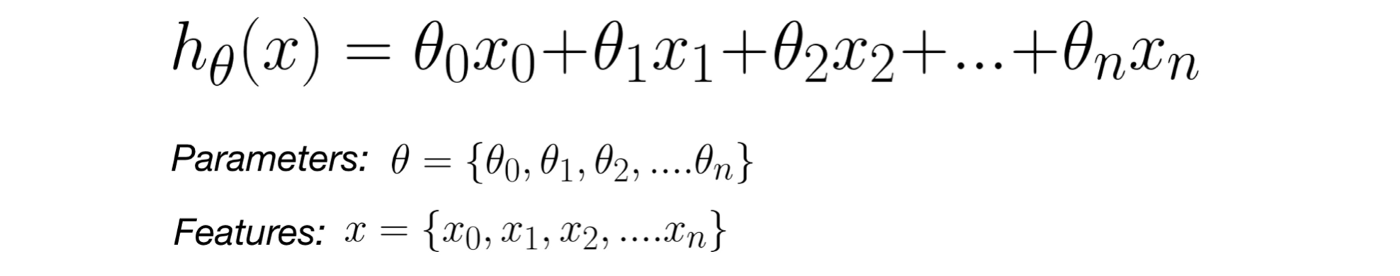

The following example shows that how to use the hypothesis function.

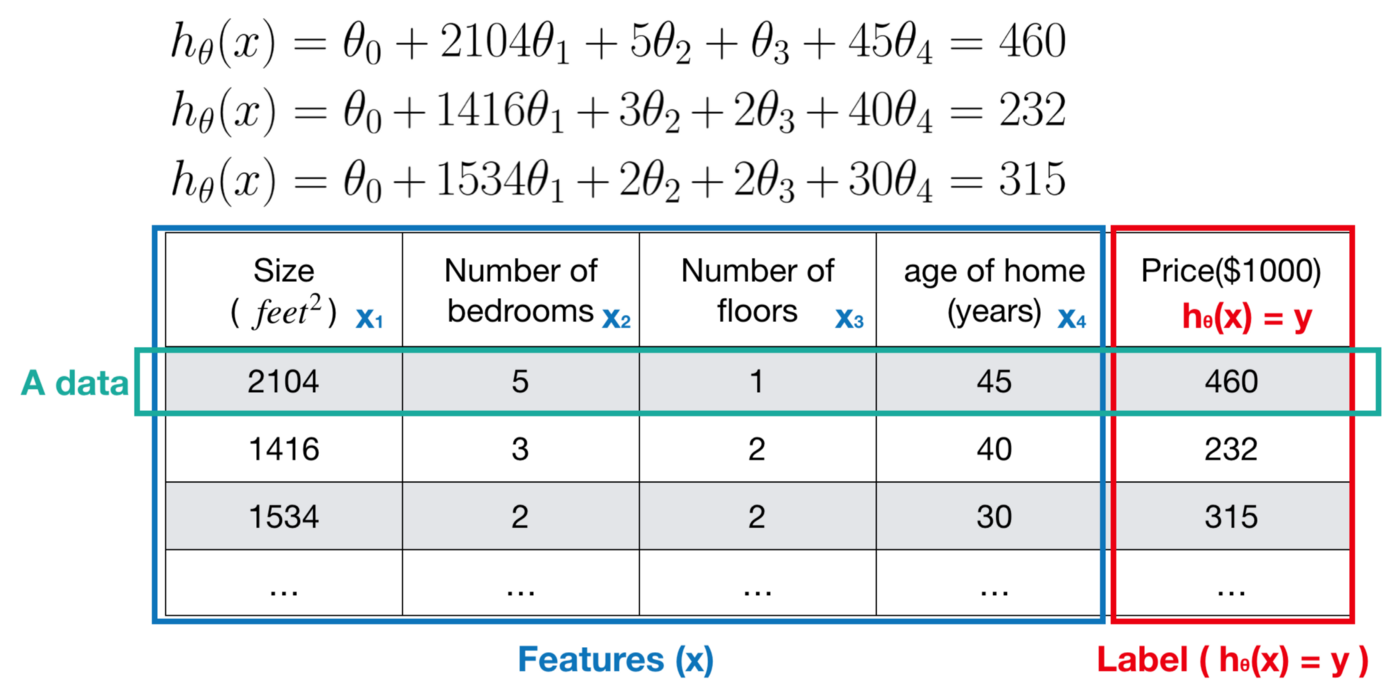

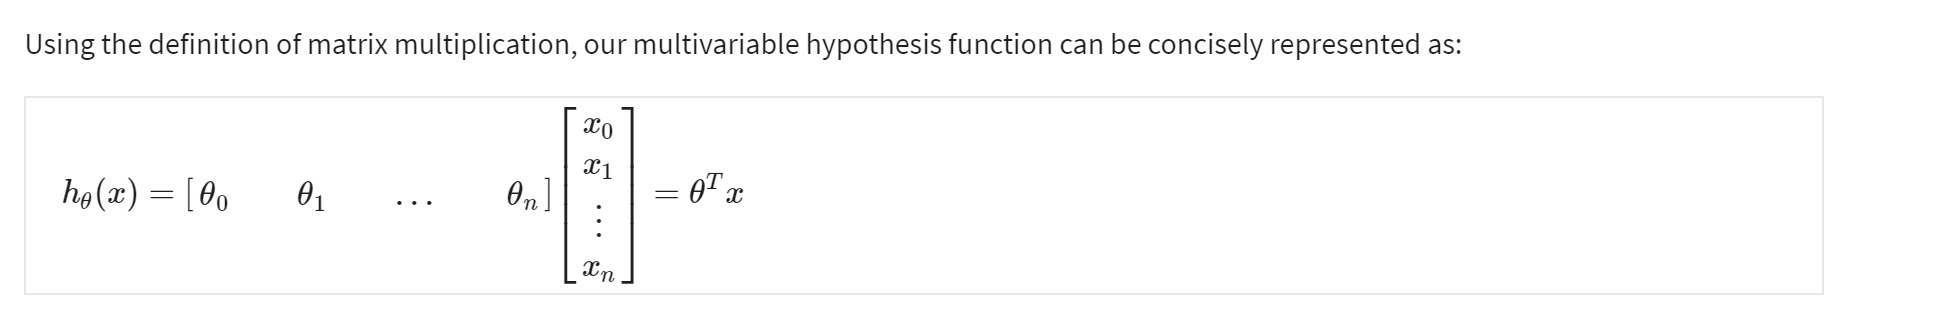

When tuning the hypothesis, our model **learns parameters θ** which makes hypothesis function h(x) a ‘good’ predictor. A Good predictor means the hypothesis is closed enough to the true model. The closer, the better.
But how do we know the **hypothesis h(x)** is good enough or not? The answer is using a **cost function**, which we defined to measure the error that the hypothesis made.

In [32]:
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

In [33]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [39]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [3]:
def computeCostMulti(X, y, theta):
    
    m = y.size  # number of training examples
    J = 0
    J = 1/(2*m) * np.sum((np.dot(X,theta)-y)**2)
    
    return J    

In [17]:
np.set_printoptions(suppress=True)

In [46]:
X

array([[   1., 2104.,    3.],
       [   1., 1600.,    3.],
       [   1., 2400.,    3.],
       [   1., 1416.,    2.],
       [   1., 3000.,    4.],
       [   1., 1985.,    4.],
       [   1., 1534.,    3.],
       [   1., 1427.,    3.],
       [   1., 1380.,    3.],
       [   1., 1494.,    3.],
       [   1., 1940.,    4.],
       [   1., 2000.,    3.],
       [   1., 1890.,    3.],
       [   1., 4478.,    5.],
       [   1., 1268.,    3.],
       [   1., 2300.,    4.],
       [   1., 1320.,    2.],
       [   1., 1236.,    3.],
       [   1., 2609.,    4.],
       [   1., 3031.,    4.],
       [   1., 1767.,    3.],
       [   1., 1888.,    2.],
       [   1., 1604.,    3.],
       [   1., 1962.,    4.],
       [   1., 3890.,    3.],
       [   1., 1100.,    3.],
       [   1., 1458.,    3.],
       [   1., 2526.,    3.],
       [   1., 2200.,    3.],
       [   1., 2637.,    3.],
       [   1., 1839.,    2.],
       [   1., 1000.,    1.],
       [   1., 2040.,    4.],
       [  

In [16]:
np.ones(3)

array([1., 1., 1.])

In [15]:
np.dot(X,np.ones(3))

array([2108., 1604., 2404., 1419., 3005., 1990., 1538., 1431., 1384.,
       1498., 1945., 2004., 1894., 4484., 1272., 2305., 1323., 1240.,
       2614., 3036., 1771., 1891., 1608., 1967., 3894., 1104., 1462.,
       2530., 2204., 2641., 1842., 1002., 2045., 3141., 1816., 1441.,
       1243., 2137., 4220., 2167., 1667., 2242., 2572., 1204.,  855.,
       1857., 1207.])

In [45]:
computeCostMulti(X,y,np.ones(3))

64828197300.797874

### Cost Function

The accuracy of Hypothesis Function h(x) can be measured by using Cost Function.

In Regression Problem, the most popular cost function is **Mean Error Square(MSE).** The formulation is defined as below.

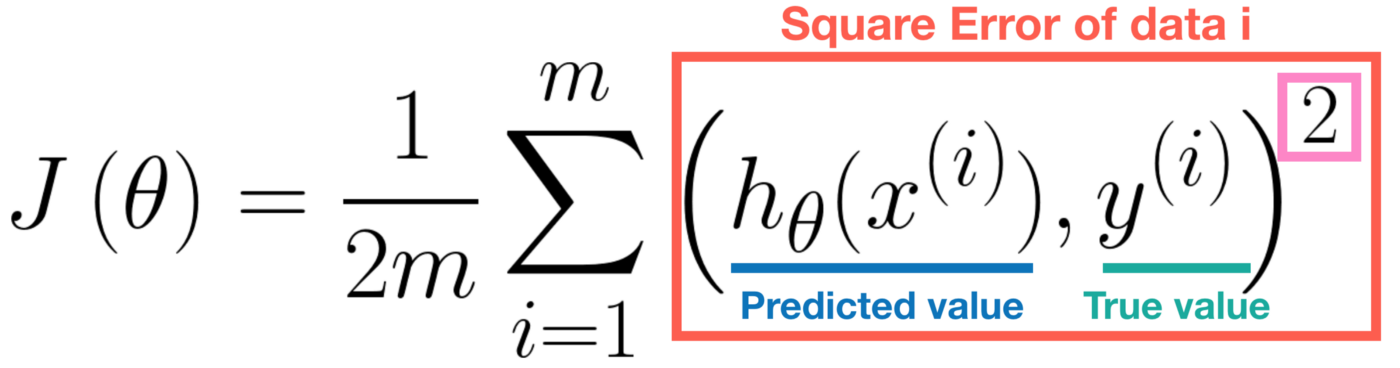


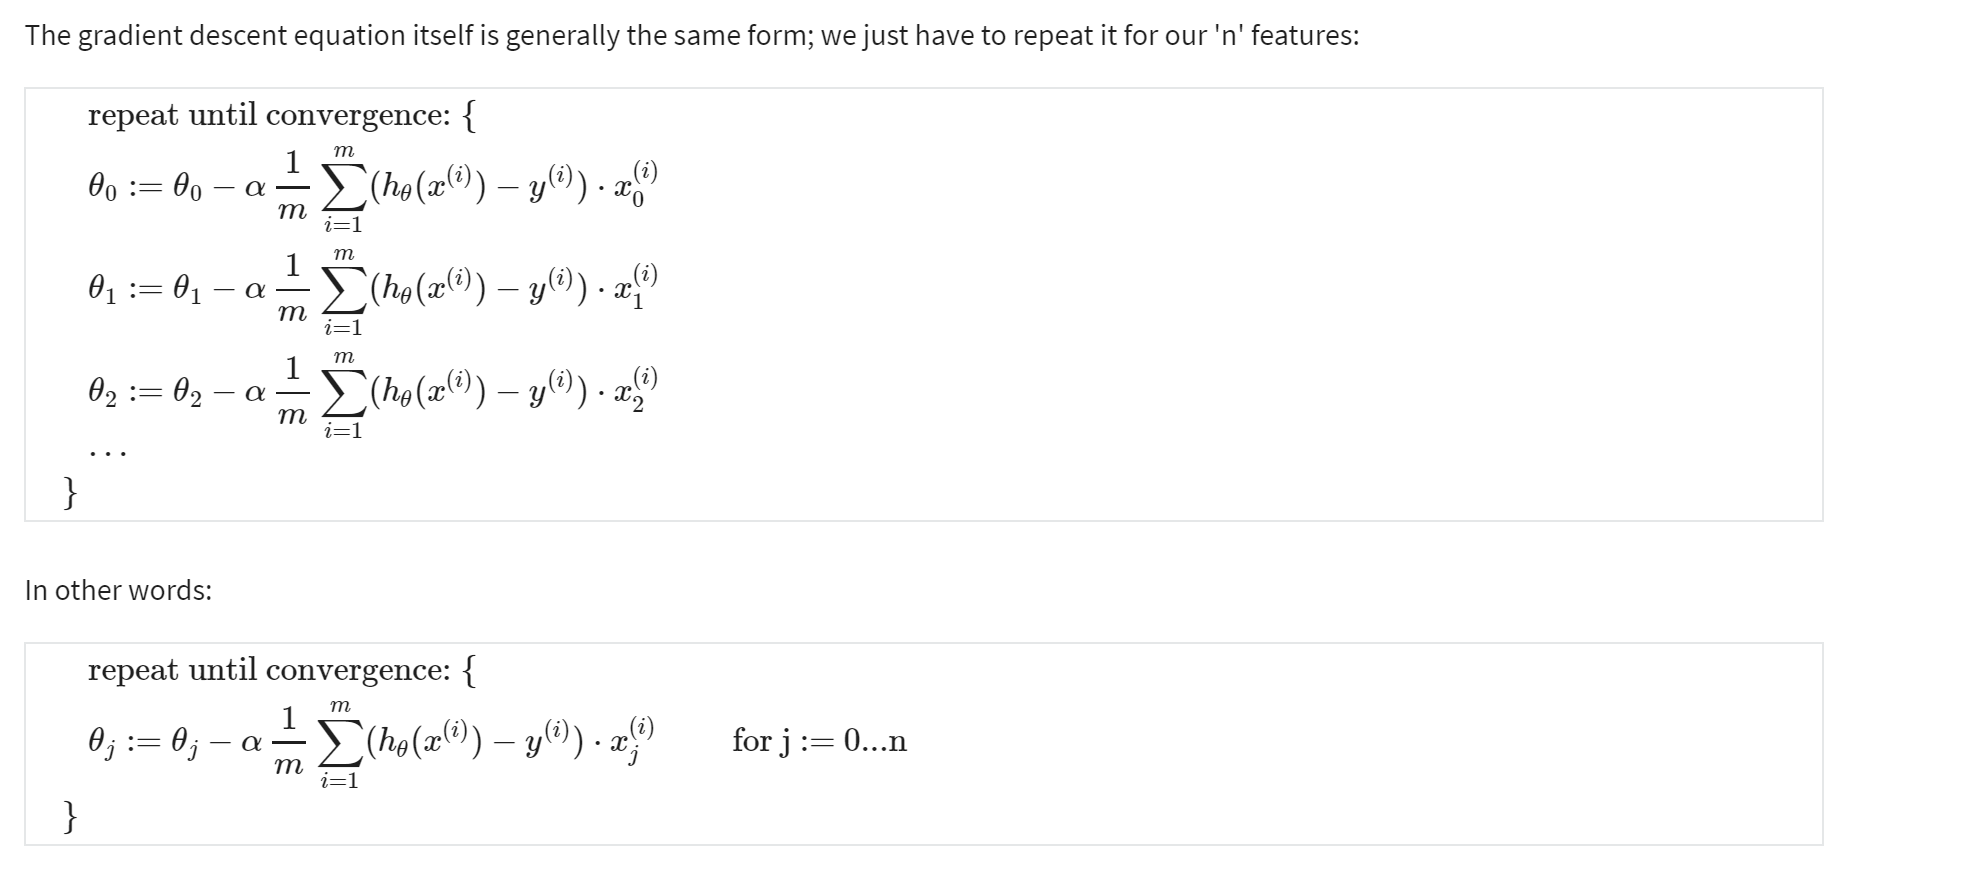

In [43]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()  
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        
        theta = theta - (alpha/m)*((np.dot(X_norm,theta)-y).dot(X))
        
        J_history.append(computeCostMulti(X, y, theta))  
    
    return theta, J_history

In [48]:
theta, J_history = gradientDescentMulti(X, y, np.zeros(3), 0.01, 1000)

C:\Users\prana\AppData\Local\Temp/ipykernel_33784/3825726944.py:5: RuntimeWarning: overflow encountered in square
  J = 1/(2*m) * np.sum((np.dot(X,theta)-y)**2)
C:\Users\prana\AppData\Local\Temp/ipykernel_33784/4247810499.py:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*((np.dot(X_norm,theta)-y).dot(X))


### Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

Feature Scaling, also called normalized features. With different range of each feature, the contours may be extremely skinny, which will make Gradient Descent suffer from extremely slow, see Figure(a). After feature scaling, the outcome shows in Figure(b).

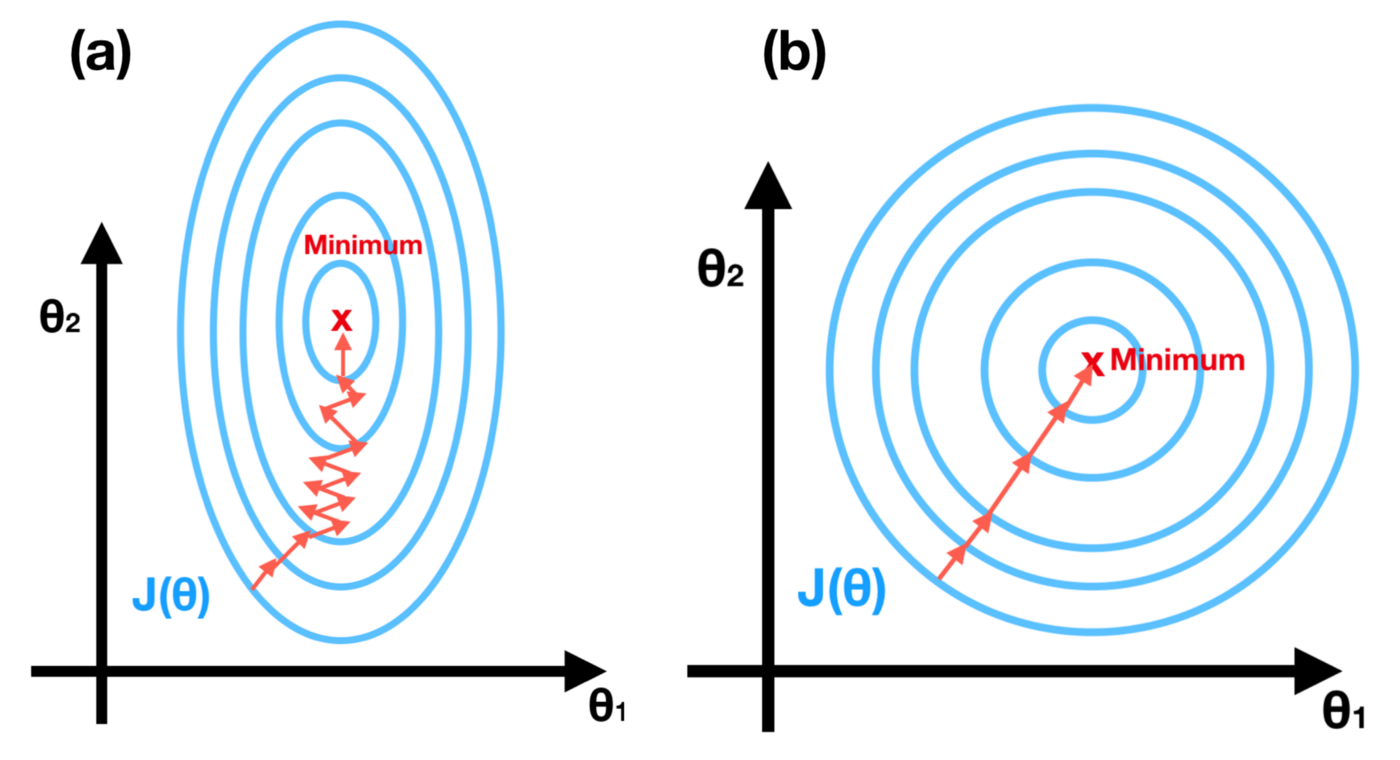

It’s worth making sure that the features are on a similar scale and roughly within the range [-1, 1].

One way to scale features is Mean Normalization, the formula is:

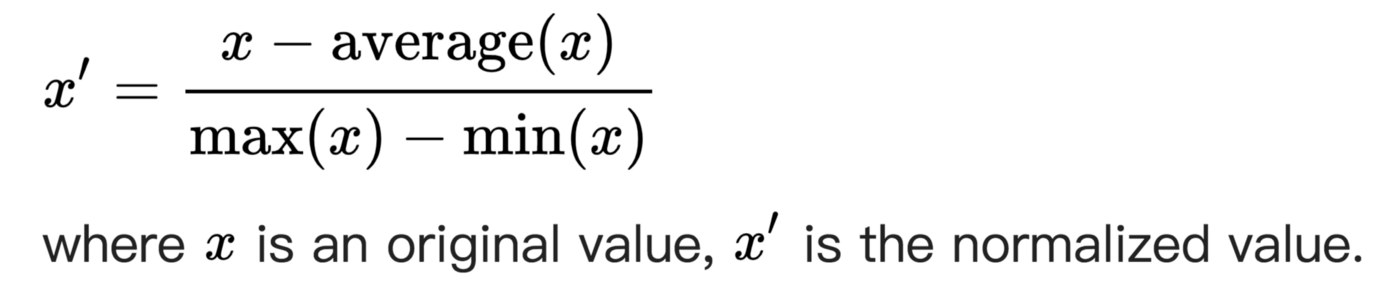

Note that dividing by the range, or dividing by the standard deviation, give different results.

In [25]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    """

    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma    
    

    return X_norm, mu, sigma

In [28]:
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: 668.2836879432624
Computed standard deviation: 1045.7916905133081


In [30]:
X_norm

array([[-0.63806559,  1.37285114, -0.63615316],
       [-0.63806559,  0.8909196 , -0.63615316],
       [-0.63806559,  1.6558903 , -0.63615316],
       [-0.63806559,  0.71497634, -0.63710937],
       [-0.63806559,  2.22961832, -0.63519695],
       [-0.63806559,  1.25906175, -0.63519695],
       [-0.63806559,  0.82780951, -0.63615316],
       [-0.63806559,  0.72549468, -0.63615316],
       [-0.63806559,  0.68055266, -0.63615316],
       [-0.63806559,  0.78956098, -0.63615316],
       [-0.63806559,  1.21603214, -0.63519695],
       [-0.63806559,  1.27340495, -0.63615316],
       [-0.63806559,  1.16822148, -0.63615316],
       [-0.63806559,  3.64290169, -0.63424073],
       [-0.63806559,  0.57345676, -0.63615316],
       [-0.63806559,  1.56026896, -0.63519695],
       [-0.63806559,  0.62317985, -0.63710937],
       [-0.63806559,  0.54285793, -0.63615316],
       [-0.63806559,  1.85573889, -0.63519695],
       [-0.63806559,  2.25926093, -0.63519695],
       [-0.63806559,  1.05060723, -0.636

In [31]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [29]:
computeCostMulti(X_norm,y,np.ones(3))

65591468556.26519

### Learning Rate

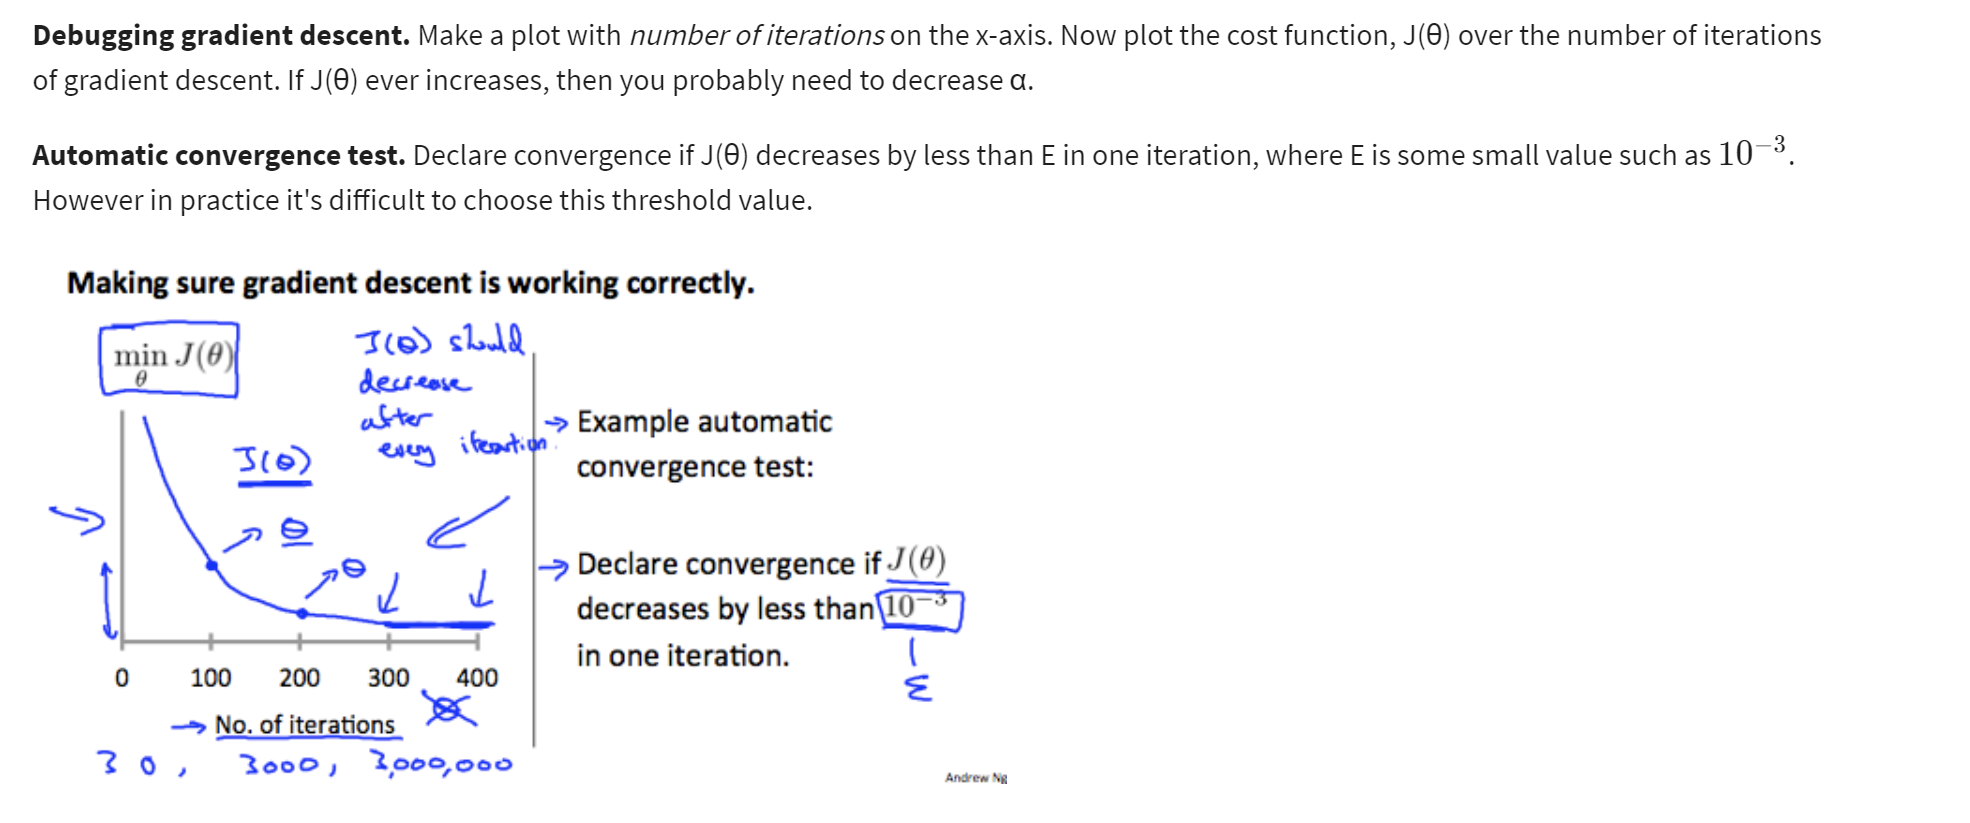

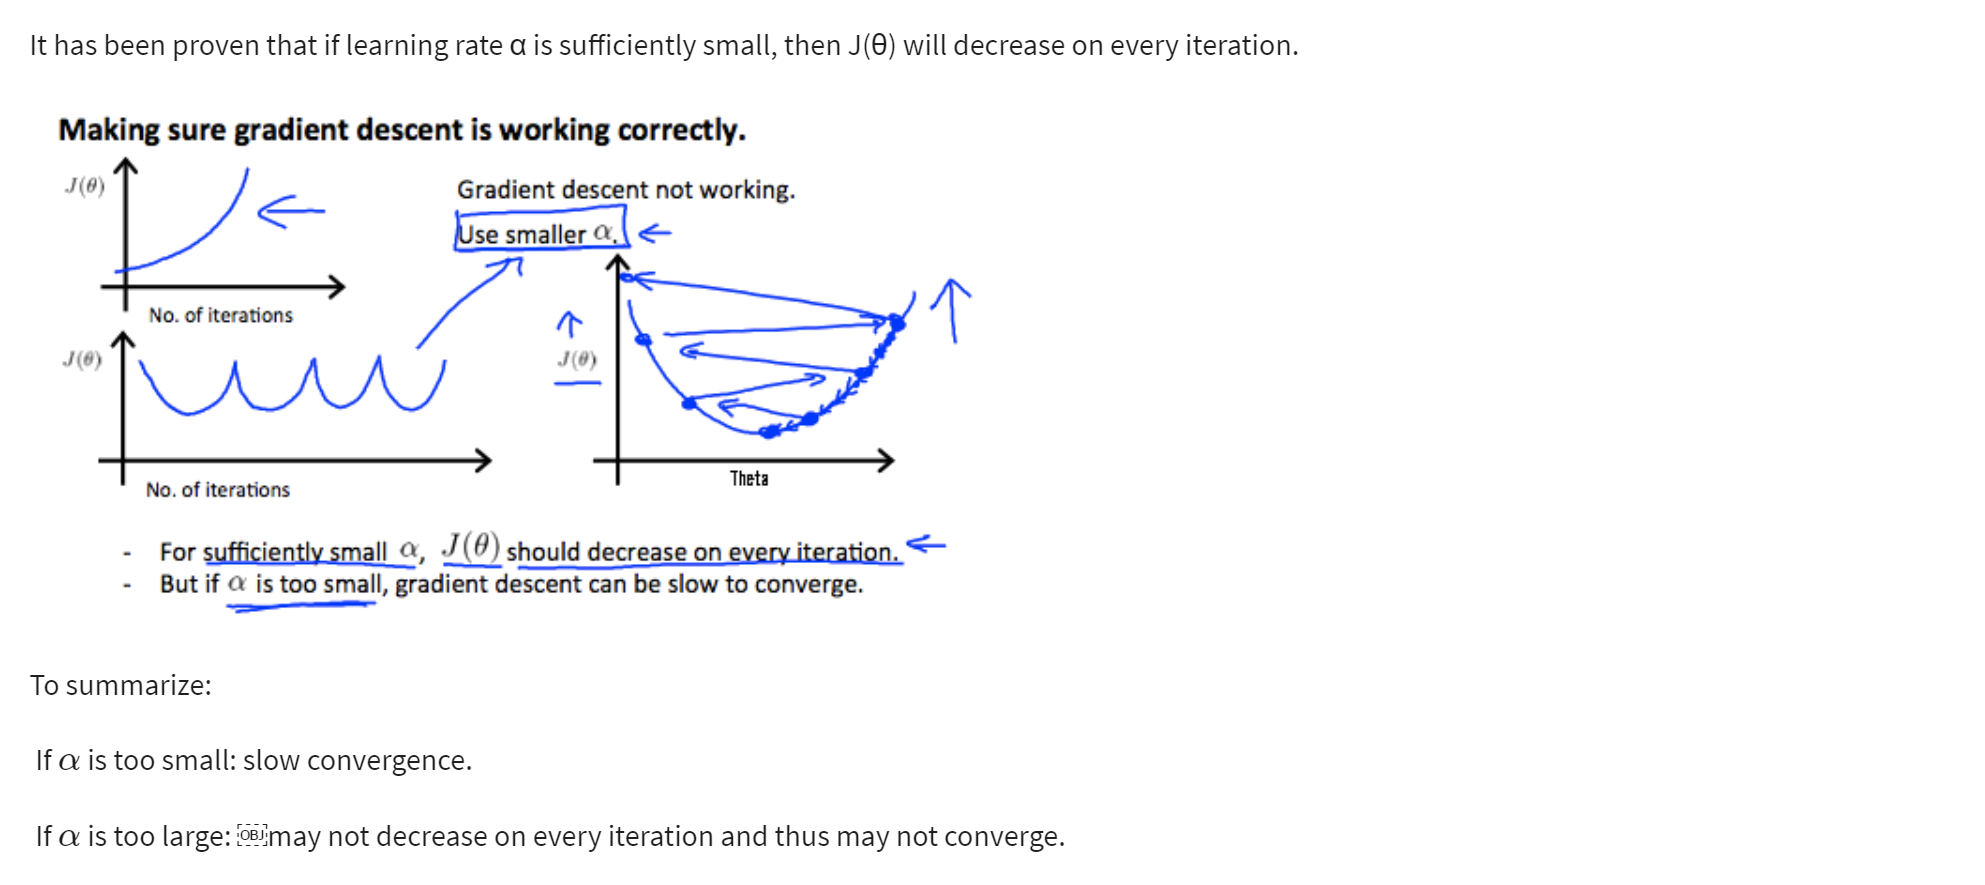

### Features and Polynomial Regression

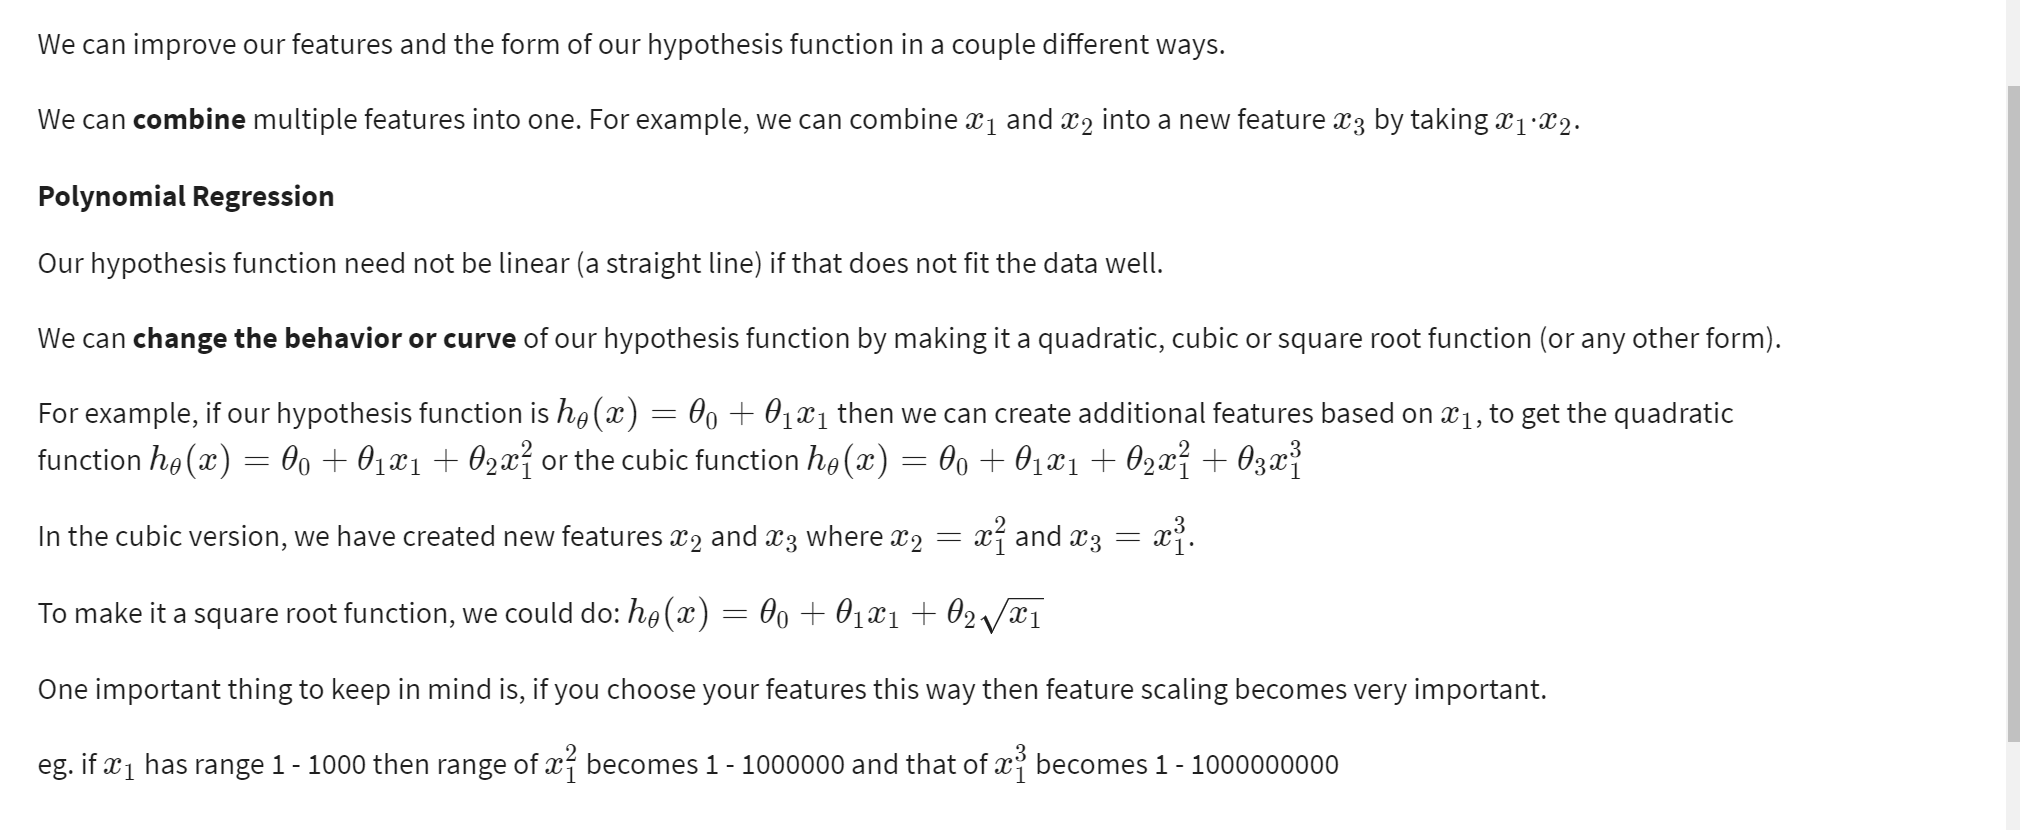

### Normal equation

Gradient descent gives one way of minimizing J. Let’s discuss a second way of doing so, this time performing the minimization explicitly and without resorting to an iterative algorithm. In the "Normal Equation" method, we will minimize J by explicitly taking its derivatives with respect to the θj ’s, and setting them to zero. This allows us to find the optimum theta without iteration. The normal equation formula is given below: 

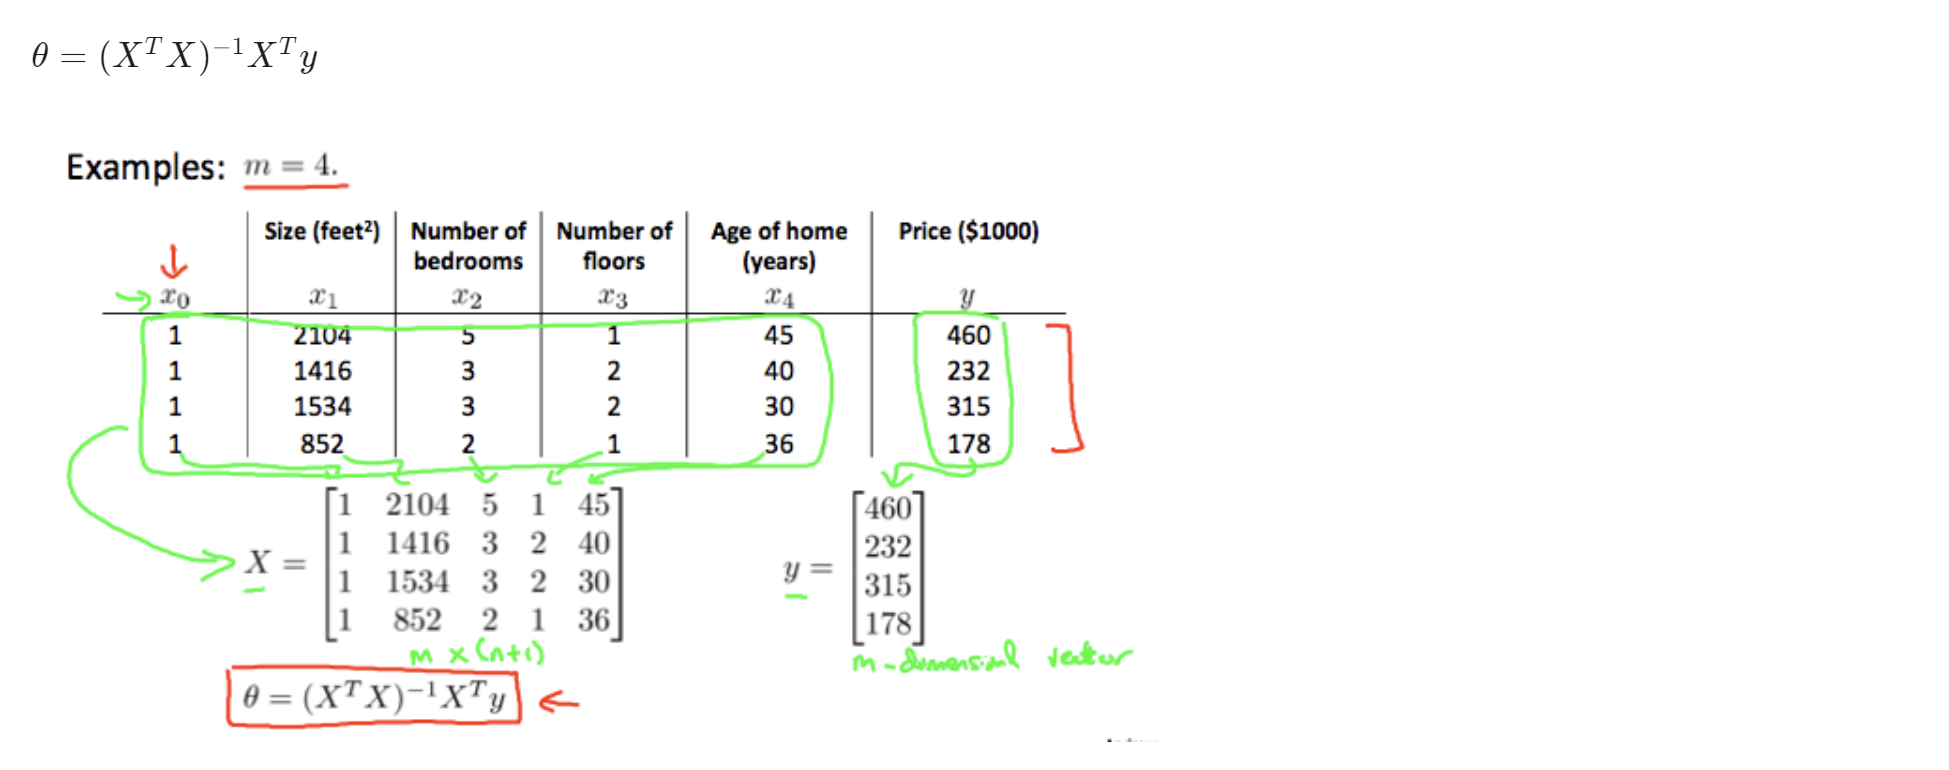

**There is no need to do feature scaling with the normal equation.**

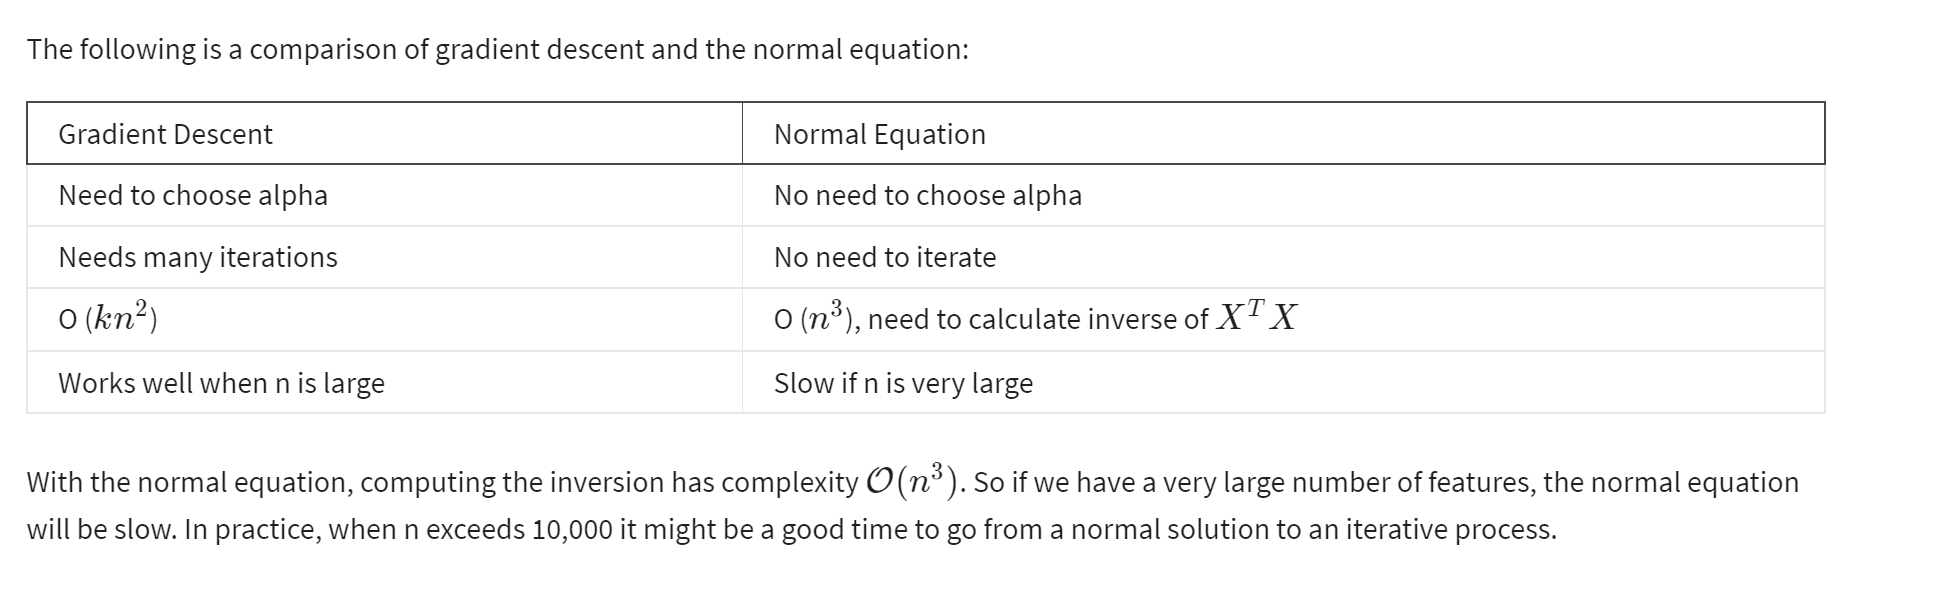

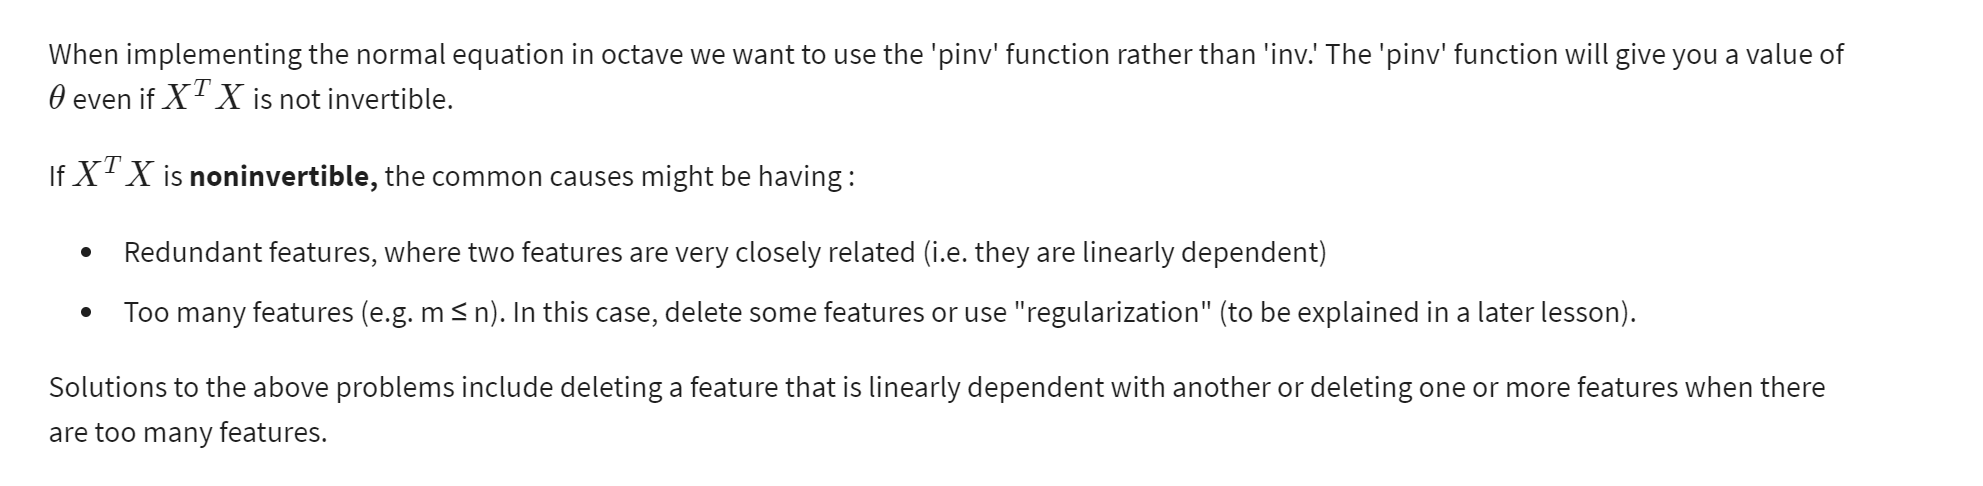

In [23]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    # =================================================================
    return theta

In [24]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = 0 # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [-3.89578088  1.19303364]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $0


#### The Problem of Overfitting

The learned model works well for training data but terrible for testing data (unknown data). In other words, the model has little training error but has huge perdition error.

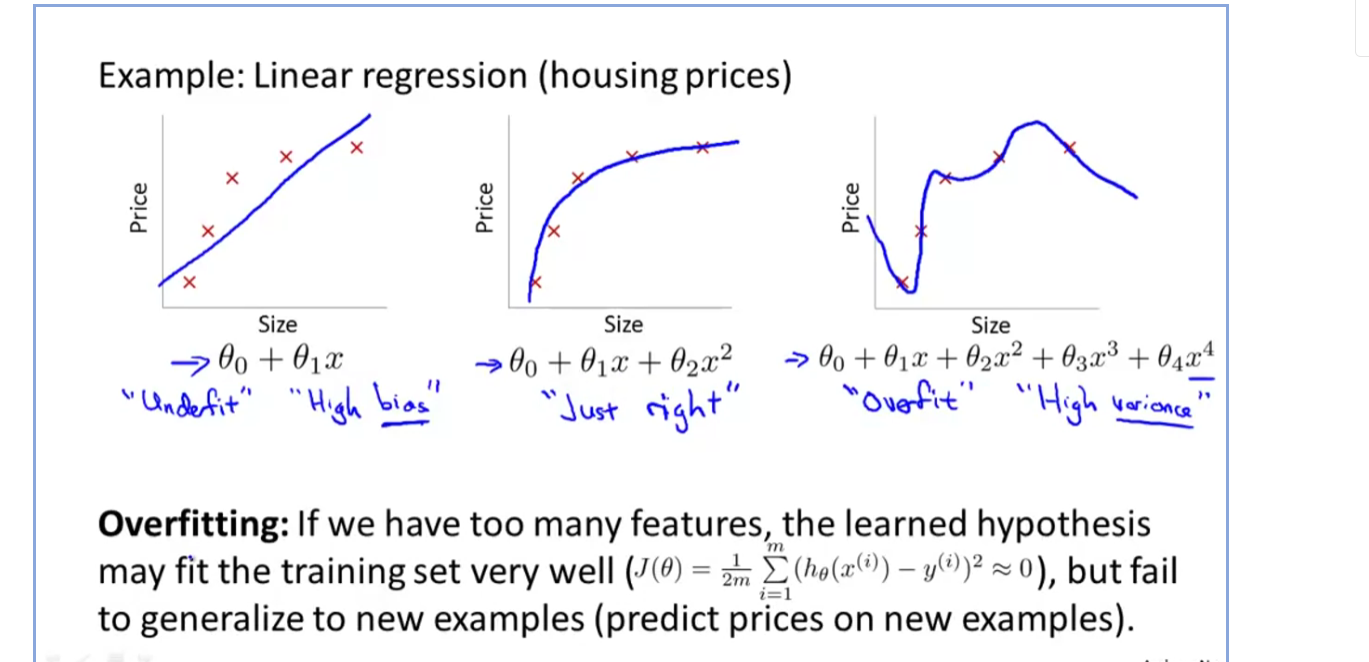

There are two main options to address the issue of overfitting:

1) Reduce the number of features:

    Manually select which features to keep.
    Use a model selection algorithm 

2) Regularization

    Keep all the features, but reduce the magnitude of parameters $theta_jθ$
    Regularization works well when we have a lot of slightly useful features.

If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

Say we wanted to make the following function more quadratic:

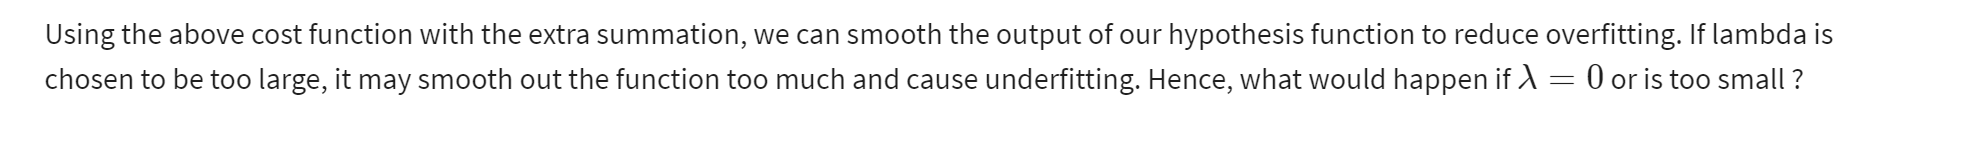

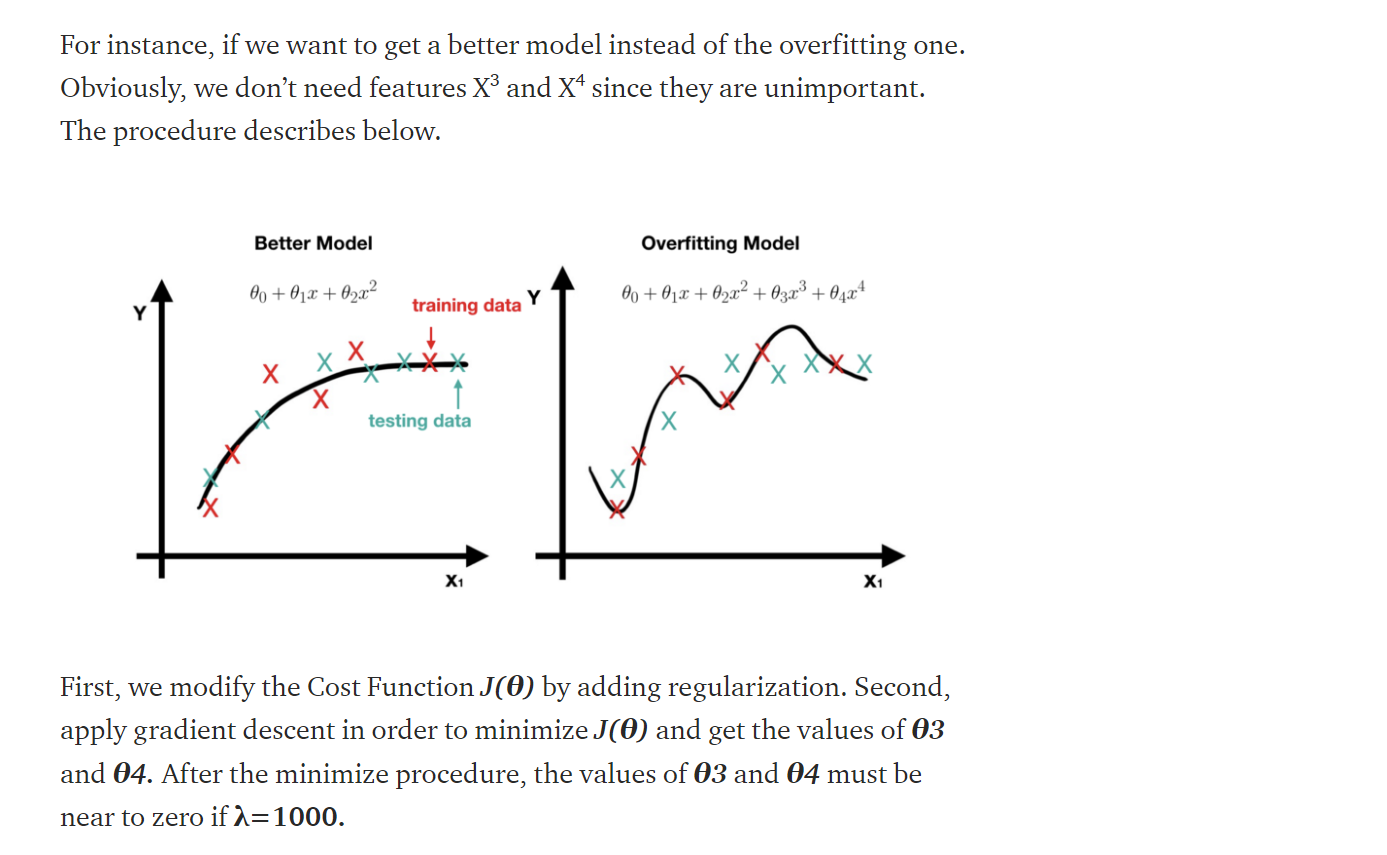

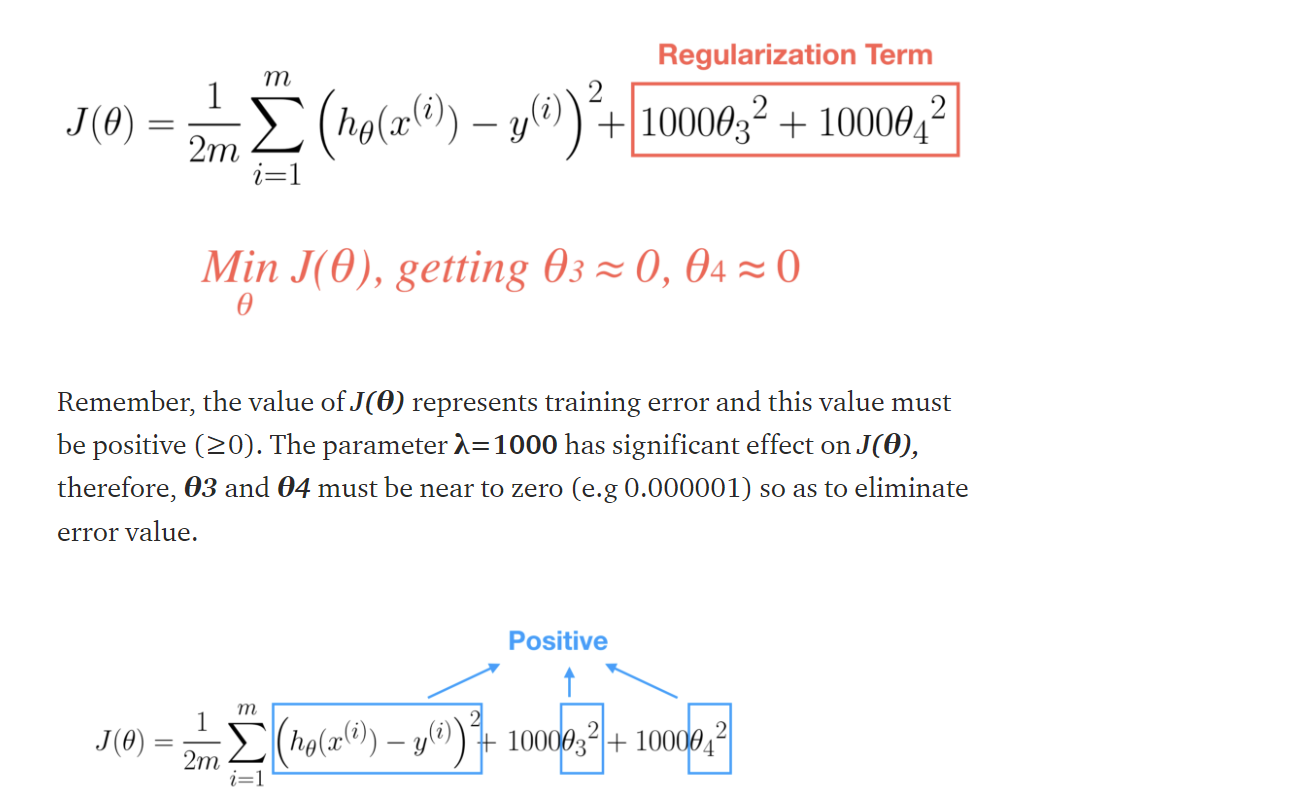

The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated. 

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. 

    If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting.
    If λ is zero or too small, its effect on parameters θ is little. This may cause Overfitting.
    
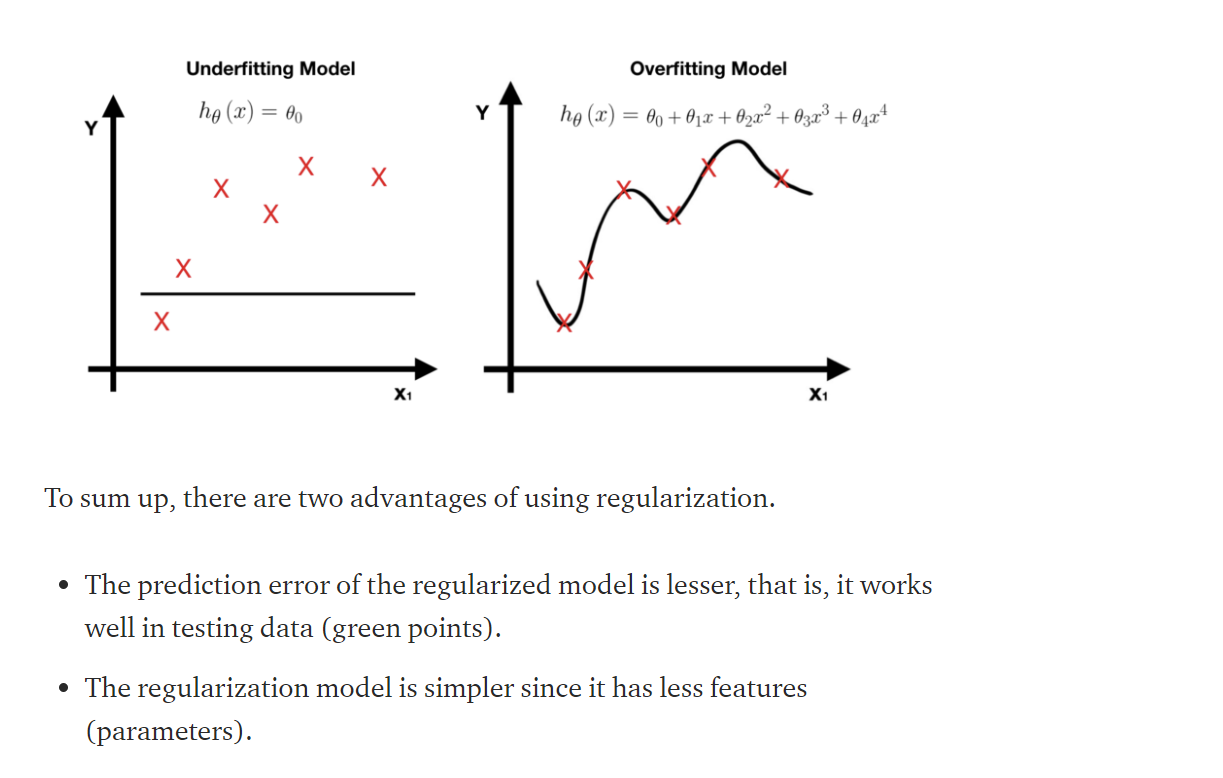

So far, we have discussed the concept of regularization. Next, we will show how to minimize regularized cost function by using gradient descent.

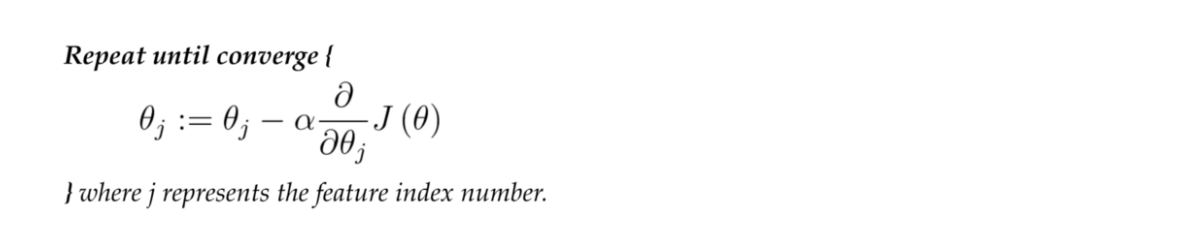

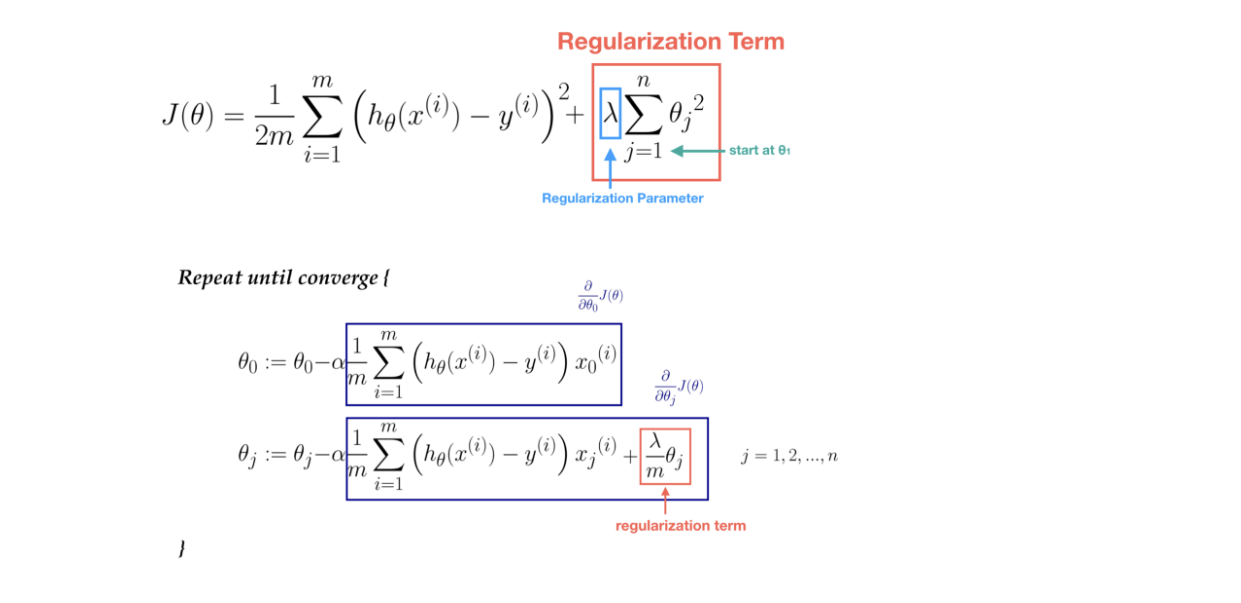

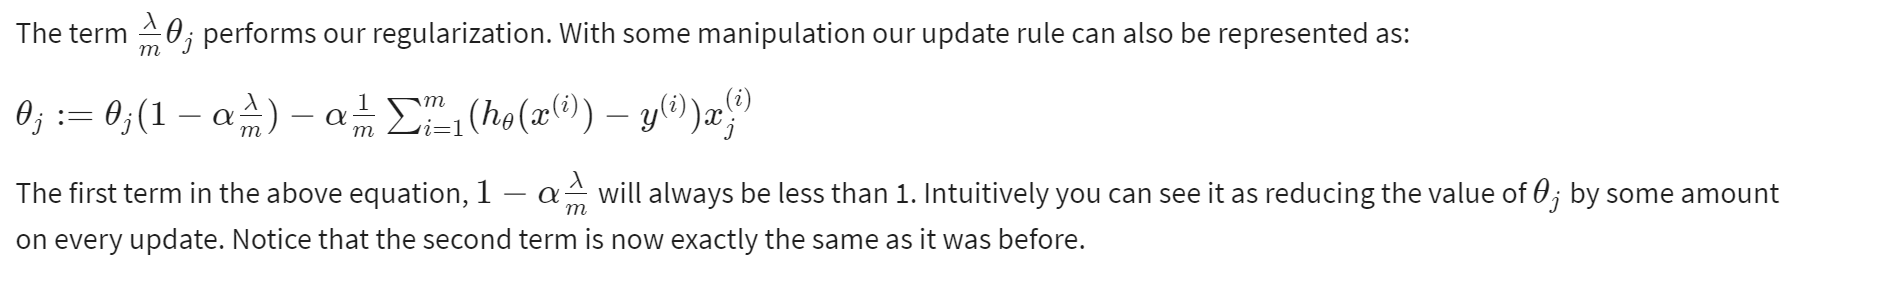

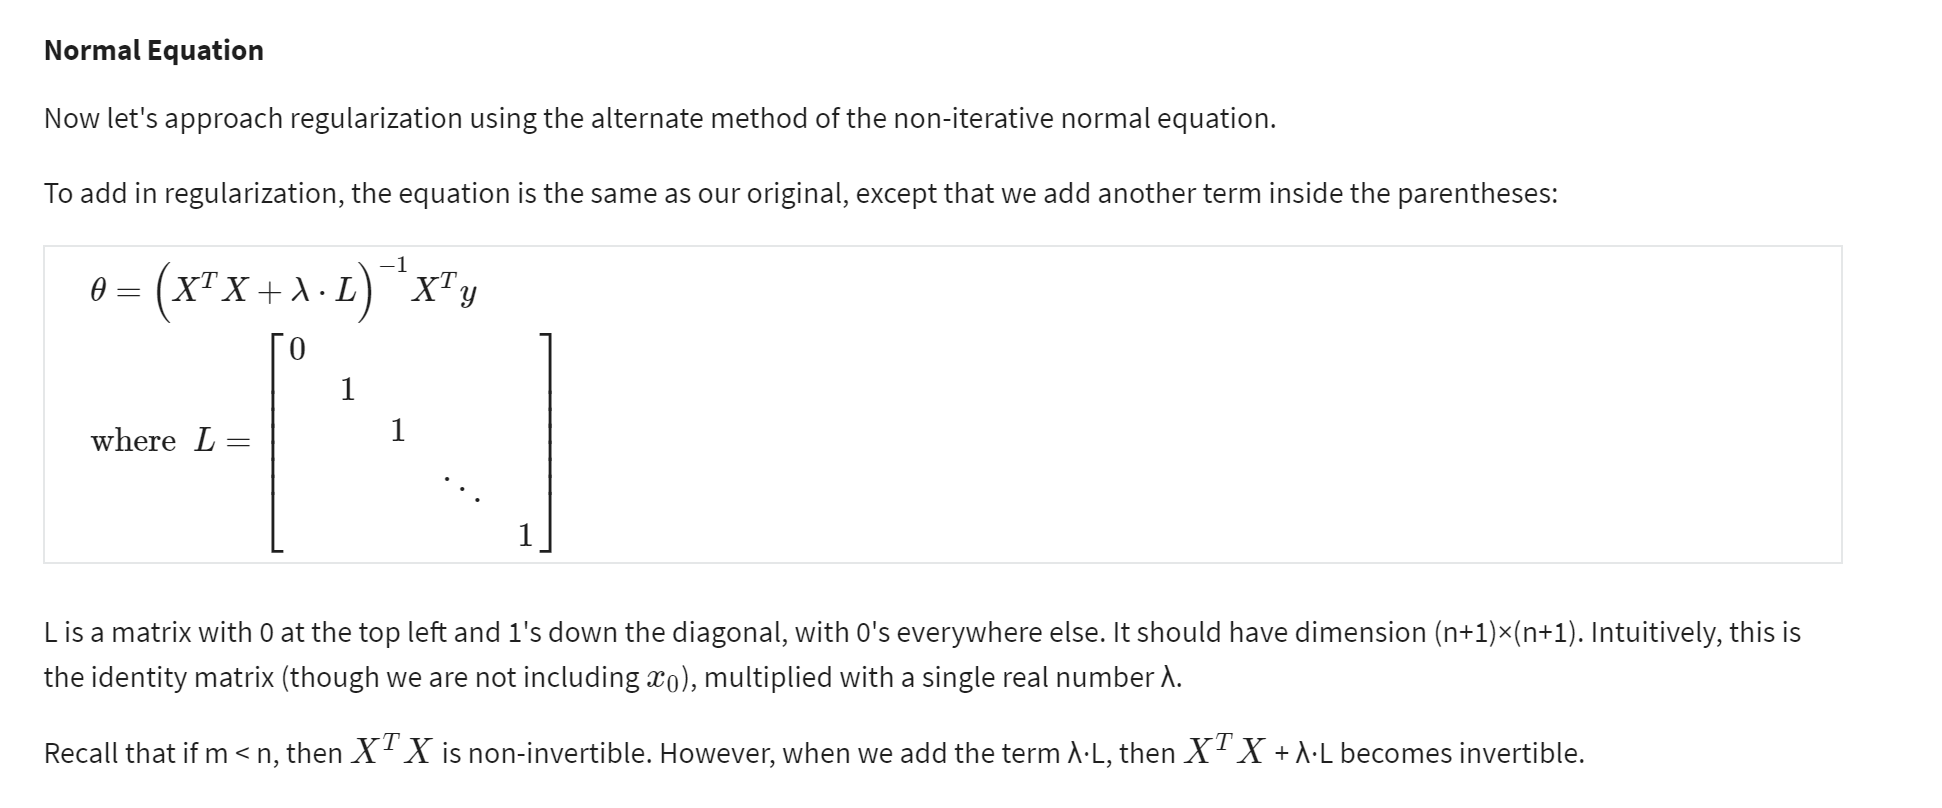